In [60]:
# Crieis os dataframes como combinado.

# - foram três variaveis (Regioes, municipios, escolas), 
# - cada variavel foi separado em iniciais e finais
# - separei por ano, cada dado

# Alguns anos, os valore de Ibed estavam com '-', retirei os valores.

# Os dataframes estão no item SEPARAR POR DADOS
# Plotei todos os gráficos, olha a primeira coluna que é o grafico do Ibed em relação as variaveis existente.

# Retirei um outlier que tinha taxa de aprovação igual a zero.

In [61]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
import numpy as np

In [62]:
#!pip install chardet

In [63]:
#!pip install --upgrade pip

In [64]:
regioes_anosfinais2005_2017 = pd.read_csv('bcgdata/ideb/ideb_uf_regioes_anosfinais2005_2017.csv',sep = ',',encoding='latin-1')
regioes_anosiniciais2005_2017 = pd.read_csv('bcgdata/ideb/ideb_uf_regioes_anosiniciais2005_2017.csv',sep = ',',encoding='latin-1')

municipios_anosfinais2005_2017 = pd.read_csv('bcgdata/ideb/ideb_municipios_anosfinais2005_2017.csv',sep = ',',encoding='latin-1')
municipios_anosiniciais2005_2017 = pd.read_csv('bcgdata/ideb/ideb_municipios_anosiniciais2005_2017.csv',sep = ',',encoding='latin-1')

escolas_anosiniciais2005_2017 = pd.read_csv('bcgdata/ideb/ideb_escolas_anosiniciais2005_2017.csv',sep = ',',encoding='latin-1')
escolas_anosfinais2005_2017 = pd.read_csv('bcgdata/ideb/ideb_escolas_anosfinais2005_2017.csv',sep = ',',encoding='latin-1')


In [65]:
municipios_anosiniciais2005_2017

,Co_UF,Cod_Municipio_Completo,Nome_Municipio,Rede,TaxaAprovacao2005_1ao5ano,TaxaAprovacao2005_1ano,TaxaAprovacao2005_2ano,TaxaAprovacao2005_3ano,TaxaAprovacao2005_4ano,TaxaAprovacao2005_5ano,...,Ideb2015,Ideb2017,ProjecaoIdeb2007,ProjecaoIdeb2009,ProjecaoIdeb2011,ProjecaoIdeb2013,ProjecaoIdeb2015,ProjecaoIdeb2017,ProjecaoIdeb2019,ProjecaoIdeb2021
0,RO,1100015.0,Alta Floresta D'Oeste,Estadual,77.2,-,70.4,78.2,73.7,82.5,...,5.8,6.2,3.6,3.9,4.3,4.6,4.9,5.2,5.5,5.7
1,RO,1100015.0,Alta Floresta D'Oeste,Municipal,-,-,-,-,-,-,...,5,5.1,-,-,-,-,-,5.3,5.5,5.8
2,RO,1100015.0,Alta Floresta D'Oeste,Pública,80.9,-,73,81.5,81.1,87.9,...,5.8,6.2,3.8,4.1,4.5,4.8,5.1,5.4,5.7,5.9
3,RO,1100023.0,Ariquemes,Estadual,87.1,-,83.3,88.6,88.5,87.5,...,5.6,6,4.1,4.4,4.8,5.1,5.4,5.6,5.9,6.2
4,RO,1100023.0,Ariquemes,Municipal,85.7,93,79,87.3,86.1,87.4,...,5,5.4,3.6,3.9,4.3,4.6,4.9,5.2,5.5,5.8
5,RO,1100023.0,Ariquemes,Pública,86,93,79.7,87.6,86.8,87.4,...,5.2,5.5,3.8,4.1,4.5,4.8,5.1,5.4,5.7,5.9
6,RO,1100031.0,Cabixi,Estadual,92.6,-,75,93,98,94.6,...,6.3,-,4.2,4.5,4.9,5.2,5.5,5.7,6,6.3
7,RO,1100031.0,Cabixi,Municipal,83.5,-,70.8,89.3,87.2,90.4,...,5.3,6.1,3.5,3.8,4.2,4.5,4.8,5.1,5.4,5.7
8,RO,1100031.0,Cabixi,Pública,86.2,-,71.5,90.3,89.8,92.6,...,5.5,6.1,3.7,4.1,4.5,4.8,5.1,5.3,5.6,5.9
9,RO,1100049.0,Cacoal,Estadual,84,-,76.8,79.1,88.8,89.3,...,6,6.5,3.8,4.2,4.6,4.9,5.1,5.4,5.7,6


In [66]:
print(regioes_anosfinais2005_2017.shape)
print(regioes_anosiniciais2005_2017.shape)
print(municipios_anosfinais2005_2017.shape)
print(municipios_anosiniciais2005_2017.shape)
print(escolas_anosiniciais2005_2017.shape)
print(escolas_anosfinais2005_2017.shape)

(128, 80)
(128, 87)
(14356, 82)
(14436, 89)
(59922, 91)
(43607, 84)


# Missing Datas

In [67]:
import seaborn as sns

In [68]:
total = regioes_anosfinais2005_2017.isnull().sum().sort_values(ascending=False)
percent = (regioes_anosfinais2005_2017.isnull().sum()/regioes_anosfinais2005_2017.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
ProjecaoIdeb2021,0,0.0
ProjecaoIdeb2019,0,0.0
TaxaAprovacao2011_6ano,0,0.0
TaxaAprovacao2011_7ano,0,0.0
TaxaAprovacao2011_8ano,0,0.0
TaxaAprovacao2011_9ano,0,0.0
IndicadorRendimento_2011,0,0.0
TaxaAprovacao2013_6ao9ano,0,0.0
TaxaAprovacao2013_6ano,0,0.0
TaxaAprovacao2013_7ano,0,0.0


In [69]:
total = regioes_anosiniciais2005_2017.isnull().sum().sort_values(ascending=False)
percent = (regioes_anosiniciais2005_2017.isnull().sum()/regioes_anosiniciais2005_2017.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
ProjecaoIdeb2021,0,0.0
TaxaAprovacao2013_1ano,0,0.0
TaxaAprovacao2011_1ao5ano,0,0.0
TaxaAprovacao2011_1ano,0,0.0
TaxaAprovacao2011_2ano,0,0.0
TaxaAprovacao2011_3ano,0,0.0
TaxaAprovacao2011_4ano,0,0.0
TaxaAprovacao2011_5ano,0,0.0
IndicadorRendimento_2011,0,0.0
TaxaAprovacao2013_1ao5ano,0,0.0


In [70]:
total = municipios_anosfinais2005_2017.isnull().sum().sort_values(ascending=False)
percent = (municipios_anosfinais2005_2017.isnull().sum()/municipios_anosfinais2005_2017.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
ProjecaoIdeb2021,0,0.0
TaxaAprovacao2009_9ano,0,0.0
TaxaAprovacao2011_6ao9ano,0,0.0
TaxaAprovacao2011_6ano,0,0.0
TaxaAprovacao2011_7ano,0,0.0
TaxaAprovacao2011_8ano,0,0.0
TaxaAprovacao2011_9ano,0,0.0
IndicadorRendimento_2011,0,0.0
TaxaAprovacao2013_6ao9ano,0,0.0
TaxaAprovacao2013_6ano,0,0.0


In [71]:
total = municipios_anosiniciais2005_2017.isnull().sum().sort_values(ascending=False)
percent = (municipios_anosiniciais2005_2017.isnull().sum()/municipios_anosiniciais2005_2017.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
ProjecaoIdeb2021,0,0.0
TaxaAprovacao2015_4ano,0,0.0
TaxaAprovacao2009_5ano,0,0.0
IndicadorRendimento_2009,0,0.0
TaxaAprovacao2011_1ao5ano,0,0.0
TaxaAprovacao2011_1ano,0,0.0
TaxaAprovacao2011_2ano,0,0.0
TaxaAprovacao2011_3ano,0,0.0
TaxaAprovacao2011_4ano,0,0.0
TaxaAprovacao2011_5ano,0,0.0


In [72]:
total = escolas_anosiniciais2005_2017.isnull().sum().sort_values(ascending=False)
percent = (escolas_anosiniciais2005_2017.isnull().sum()/escolas_anosiniciais2005_2017.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
ProjecaoIdeb2021,0,0.0
TaxaAprovacao2009_2ano,0,0.0
TaxaAprovacao2009_4ano,0,0.0
TaxaAprovacao2009_5ano,0,0.0
IndicadorRendimento_2009,0,0.0
TaxaAprovacao2011_1ao5ano,0,0.0
TaxaAprovacao2011_1ano,0,0.0
TaxaAprovacao2011_2ano,0,0.0
TaxaAprovacao2011_3ano,0,0.0
TaxaAprovacao2011_4ano,0,0.0


In [73]:
total = escolas_anosfinais2005_2017.isnull().sum().sort_values(ascending=False)
percent = (escolas_anosfinais2005_2017.isnull().sum()/escolas_anosfinais2005_2017.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
ProjecaoIdeb2021,0,0.0
TaxaAprovacao2013_6ao9ano,0,0.0
TaxaAprovacao2009_9ano,0,0.0
IndicadorRendimento_2009,0,0.0
TaxaAprovacao2011_6ao9ano,0,0.0
TaxaAprovacao2011_6ano,0,0.0
TaxaAprovacao2011_7ano,0,0.0
TaxaAprovacao2011_8ano,0,0.0
TaxaAprovacao2011_9ano,0,0.0
IndicadorRendimento_2011,0,0.0


# Separar os dados

In [74]:
dados2005_inic = pd.DataFrame(regioes_anosiniciais2005_2017.iloc[:,0:2])
dados2005_inic = pd.concat([dados2005_inic,regioes_anosiniciais2005_2017.filter(like='2005')], axis=1)
dados2005_inic = dados2005_inic.rename(columns={"TaxaAprovacao2005_1ao5ano": "TaxaAprovacao_1ao5ano",
                                     "TaxaAprovacao2005_1ano": "TaxaAprovacao_1ano",
                                     "TaxaAprovacao2005_2ano": "TaxaAprovacao_2ano",
                                     "TaxaAprovacao2005_3ano": "TaxaAprovacao_3ano",
                                     "TaxaAprovacao2005_4ano": "TaxaAprovacao_4ano",
                                     "TaxaAprovacao2005_5ano": "TaxaAprovacao_5ano",
                                     "IndicadorRendimento_2005": "IndicadorRendimento_inicial",
                                     "NotaProvaBrasil_MT_2005": "NotaProvaBrasil_MT_inicial",
                                     "NotaProvaBrasil_LP_2005": "NotaProvaBrasil_LP_inicial",
                                     "NotaProvaBrasil_NotaMedia_2005": "NotaProvaBrasil_NotaMedia_inicial",
                                     "Ideb2005": "Ideb",
                                     "ProjecaoIdeb2005": "ProjecaoIdeb_inicial"})
dados2005_inic

,UF_REG,Rede,TaxaAprovacao_1ao5ano,TaxaAprovacao_1ano,TaxaAprovacao_2ano,TaxaAprovacao_3ano,TaxaAprovacao_4ano,TaxaAprovacao_5ano,IndicadorRendimento_inicial,NotaProvaBrasil_MT_inicial,NotaProvaBrasil_LP_inicial,NotaProvaBrasil_NotaMedia_inicial,Ideb
0,Norte,Total,71.8,87,61.3,71.5,77.0,80.3,0.743674,166.9700,160.5300,4.069301,3.0
1,Norte,Pública,70.6,87,60.1,70.4,75.9,79.4,0.734134,164.1329,157.8398,3.966175,2.9
2,Norte,Privada,96.7,100,95.4,96.9,97.2,97.4,0.973575,211.0500,202.3300,5.670455,5.5
3,Norte,Estadual,77.5,92.2,69.2,76.3,80.3,83.3,0.795404,166.4000,161.3100,4.072460,3.2
4,Rondônia,Total,82.4,93,73.7,82.5,86.1,87.7,0.840911,174.7300,166.4900,4.329524,3.6
5,Rondônia,Pública,81.5,93,72.2,81.5,85.3,87.0,0.832077,171.4506,163.5116,4.212787,3.5
6,Rondônia,Privada,97.4,-,95.9,97.8,98.1,98.1,0.974663,217.3400,205.1800,5.842389,5.7
7,Rondônia,Estadual,83.7,-,80.6,81.4,85.7,86.7,0.835167,171.9400,166.2800,4.272553,3.6
8,Acre,Total,74.8,97,60.6,77.4,83.0,86.8,0.789892,172.3300,170.3200,4.353542,3.4
9,Acre,Pública,73.8,97,59.5,76.5,82.2,86.2,0.781809,169.0968,167.6541,4.243167,3.3


Numerical features : 9
Categorical features : 3


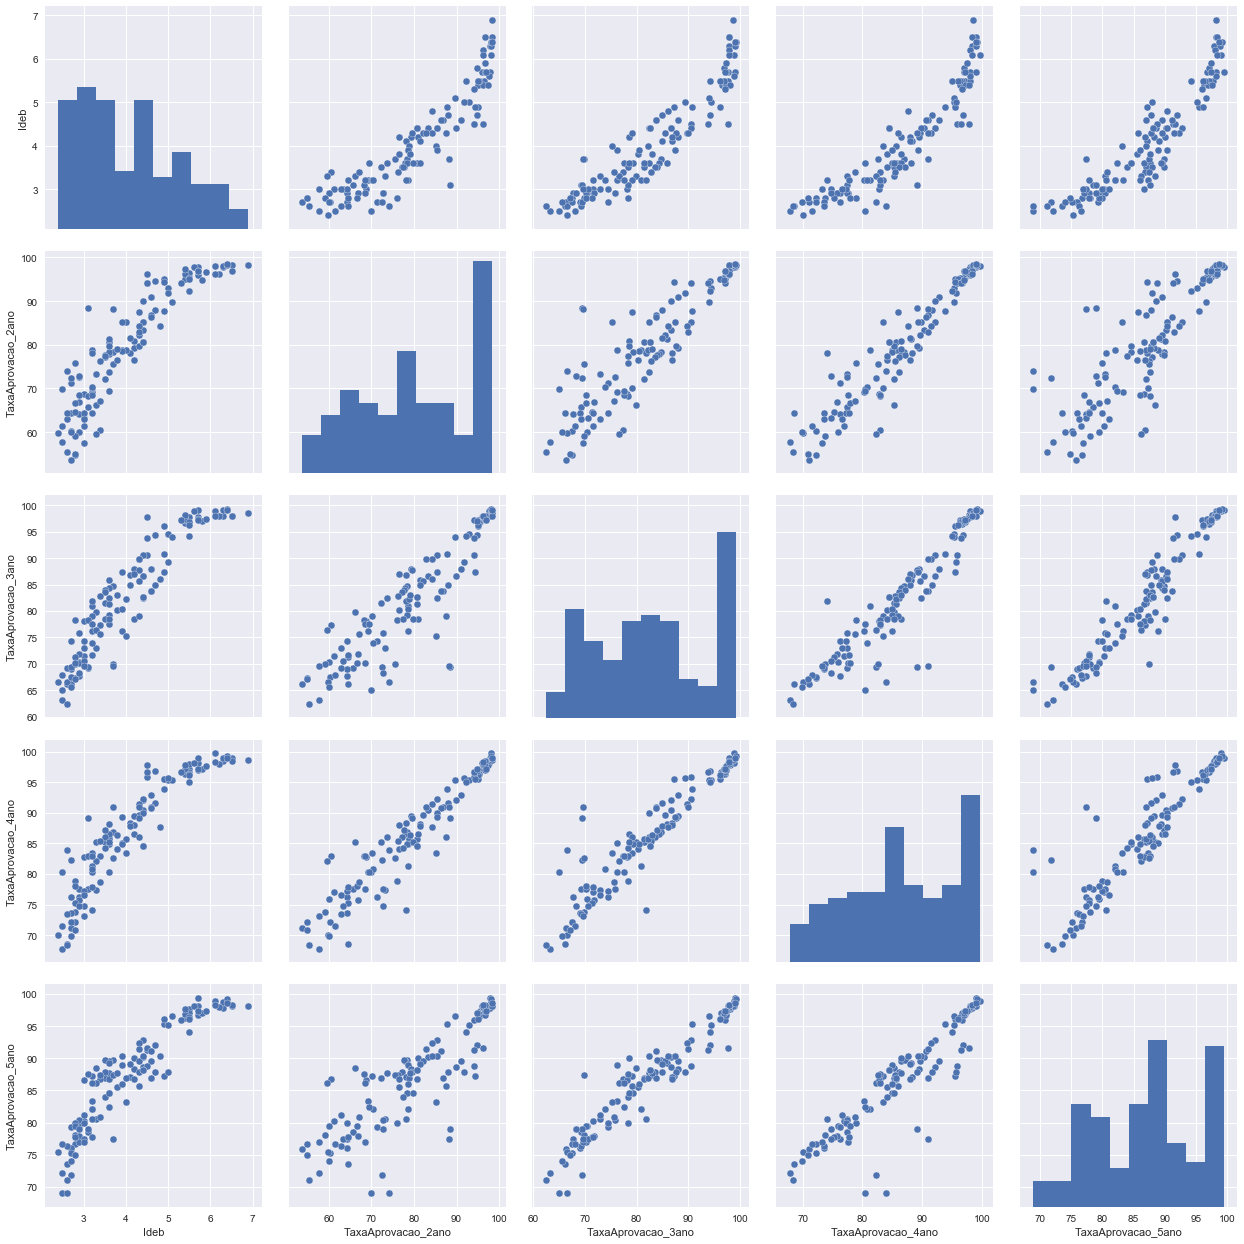

In [75]:
#scatterplot
categorical_features = dados2005_inic.select_dtypes(include = ["object"]).columns
numerical_features = dados2005_inic.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("Ideb")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
dados2005_inic_num = dados2005_inic[numerical_features]
dados2005_inic_cat = dados2005_inic[categorical_features]

sns.set()
cols = ['Ideb']
cols.extend(numerical_features[1:5].tolist())
sns.pairplot(dados2005_inic[cols], size = 3.5)
plt.show();

In [76]:
dados2005_fim = pd.DataFrame(regioes_anosfinais2005_2017.iloc[:,0:2])
dados2005_fim = pd.concat([dados2005_fim,regioes_anosfinais2005_2017.filter(like='2005')], axis=1)
dados2005_fim = dados2005_fim.rename(columns={"TaxaAprovacao2005_6ao9ano": "TaxaAprovacao_6ao9ano",
                                     "TaxaAprovacao2005_6ano": "TaxaAprovacao_6ano",
                                     "TaxaAprovacao2005_7ano": "TaxaAprovacao_7ano",
                                     "TaxaAprovacao2005_8ano": "TaxaAprovacao_8ano",
                                     "TaxaAprovacao2005_9ano": "TaxaAprovacao_9ano",
                                     "IndicadorRendimento_2005": "IndicadorRendimento_finais",
                                     "NotaProvaBrasil_MT_2005": "NotaProvaBrasil_MT_finais",
                                     "NotaProvaBrasil_LP_2005": "NotaProvaBrasil_LP_finais",
                                     "NotaProvaBrasil_NotaMedia_2005": "NotaProvaBrasil_NotaMedia_finais",
                                     "Ideb2005": "Ideb",
                                     "ProjecaoIdeb2005": "ProjecaoIdeb_finais"})
dados2005_fim

,UF_REG,Rede,TaxaAprovacao_6ao9ano,TaxaAprovacao_6ano,TaxaAprovacao_7ano,TaxaAprovacao_8ano,TaxaAprovacao_9ano,IndicadorRendimento_finais,NotaProvaBrasil_MT_finais,NotaProvaBrasil_LP_finais,NotaProvaBrasil_NotaMedia_finais,Ideb
0,Norte,Total,75.3,71.0,75.7,78.5,78.9,0.758903,226.8000,225.8400,4.210728,3.2
1,Norte,Pública,74.1,69.8,74.5,77.3,77.7,0.746881,222.2568,221.9851,4.070698,3.0
2,Norte,Privada,95.1,95.6,95.3,95.5,93.8,0.950444,273.4700,265.4700,5.648932,5.4
3,Norte,Estadual,75.3,72.0,75.4,77.5,77.3,0.754841,222.8400,223.0000,4.097388,3.1
4,Rondônia,Total,73.8,69.4,72.6,76.4,79.6,0.743009,240.3600,232.8800,4.554148,3.4
5,Rondônia,Pública,72.5,68.2,71.2,75.2,78.6,0.730884,231.9181,226.5749,4.308217,3.1
6,Rondônia,Privada,94.2,95.6,94.1,94.7,92.6,0.942373,296.1400,274.5600,6.178323,5.8
7,Rondônia,Estadual,72.8,69.2,71.8,75.5,77.2,0.732912,232.5100,227.6600,4.336080,3.2
8,Acre,Total,82.1,77.3,82.7,85.3,86.1,0.827023,226.6900,228.2500,4.248950,3.5
9,Acre,Pública,81.1,76.3,82.0,84.4,85.3,0.818449,223.0579,224.7030,4.129348,3.4


Numerical features : 9
Categorical features : 2


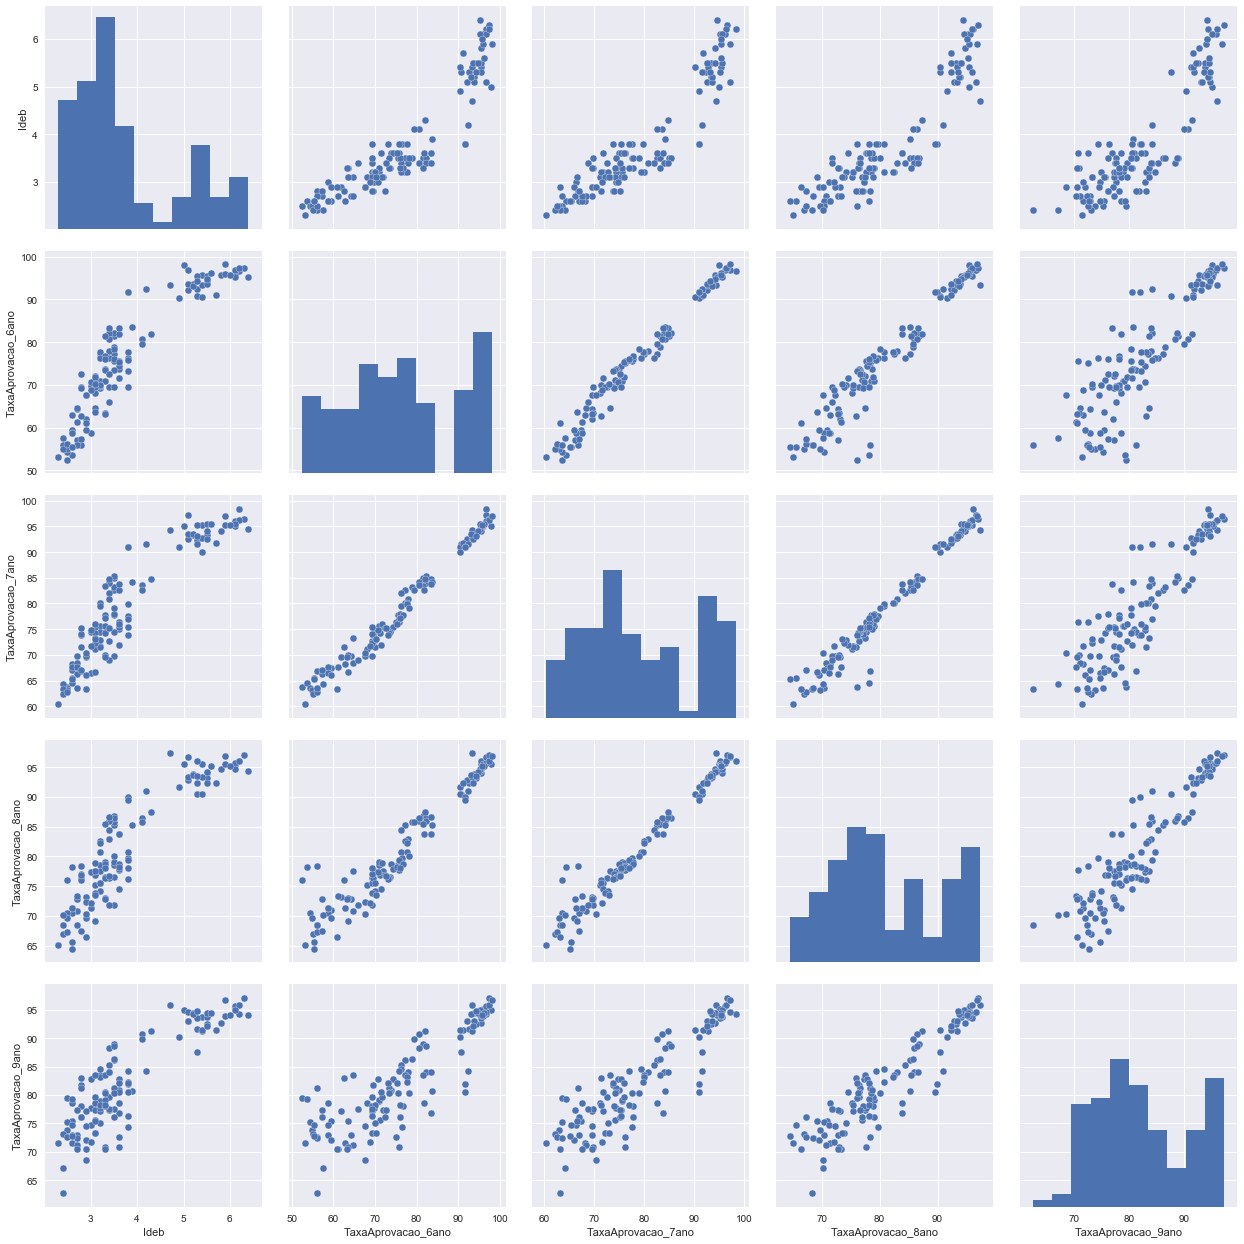

In [77]:
#scatterplot
categorical_features = dados2005_fim.select_dtypes(include = ["object"]).columns
numerical_features = dados2005_fim.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("Ideb")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
dados2005_fim_num = dados2005_fim[numerical_features]
dados2005_fim_cat = dados2005_fim[categorical_features]

sns.set()
cols = ['Ideb']
cols.extend(numerical_features[1:5].tolist())
sns.pairplot(dados2005_fim[cols], size = 3.5)
plt.show();

# Ano 2007

In [78]:
dados2007_inic = pd.DataFrame(regioes_anosiniciais2005_2017.iloc[:,0:2])
dados2007_inic = pd.concat([dados2007_inic,regioes_anosiniciais2005_2017.filter(like='2007')], axis=1)
dados2007_inic = dados2007_inic.rename(columns={"TaxaAprovacao2007_1ao5ano": "TaxaAprovacao_1ao5ano",
                                     "TaxaAprovacao2007_1ano": "TaxaAprovacao_1ano",
                                     "TaxaAprovacao2007_2ano": "TaxaAprovacao_2ano",
                                     "TaxaAprovacao2007_3ano": "TaxaAprovacao_3ano",
                                     "TaxaAprovacao2007_4ano": "TaxaAprovacao_4ano",
                                     "TaxaAprovacao2007_5ano": "TaxaAprovacao_5ano",
                                     "IndicadorRendimento_2007": "IndicadorRendimento_inicial",
                                     "NotaProvaBrasil_MT_2007": "NotaProvaBrasil_MT_inicial",
                                     "NotaProvaBrasil_LP_2007": "NotaProvaBrasil_LP_inicial",
                                     "NotaProvaBrasil_NotaMedia_2007": "NotaProvaBrasil_NotaMedia_inicial",
                                     "Ideb2007": "Ideb",
                                     "ProjecaoIdeb2007": "ProjecaoIdeb_inicial"})
dados2007_inic

,UF_REG,Rede,TaxaAprovacao_1ao5ano,TaxaAprovacao_1ano,TaxaAprovacao_2ano,TaxaAprovacao_3ano,TaxaAprovacao_4ano,TaxaAprovacao_5ano,IndicadorRendimento_inicial,NotaProvaBrasil_MT_inicial,NotaProvaBrasil_LP_inicial,NotaProvaBrasil_NotaMedia_inicial,Ideb,ProjecaoIdeb_inicial
0,Norte,Total,76.1,89.5,66.6,74.0,80.3,82.4,0.777715,179.17,163.89,4.367263,3.4,3.1
1,Norte,Pública,75.2,89.1,65.4,73.0,79.5,81.6,0.768687,176.66,161.24,4.271003,3.3,3.0
2,Norte,Privada,96.9,96.8,95.7,96.7,97.8,97.6,0.969142,215.46,202.16,5.756721,5.6,5.6
3,Norte,Estadual,79.6,93.9,72.3,77.1,82.9,83.2,0.812572,181.91,167.41,4.483552,3.6,3.3
4,Rondônia,Total,85.5,94.7,77.9,83.7,87.1,89.6,0.862280,187.23,171.07,4.651706,4.0,3.7
5,Rondônia,Pública,84.7,94.5,76.3,82.7,86.3,89.0,0.853191,184.53,168.51,4.553622,3.9,3.6
6,Rondônia,Privada,97.7,98.9,95.8,98.5,98.5,97.9,0.979073,218.49,200.73,5.788604,5.7,5.8
7,Rondônia,Estadual,85.2,91,80.7,82.2,86.1,88.7,0.855660,186.52,170.24,4.623115,4.0,3.6
8,Acre,Total,79.0,95.5,65.8,80.9,85.9,89.7,0.822106,185.58,173.84,4.670651,3.8,3.5
9,Acre,Pública,78.3,95,65.0,80.3,85.4,89.3,0.816033,182.75,171.13,4.567270,3.7,3.4


Numerical features : 10
Categorical features : 3


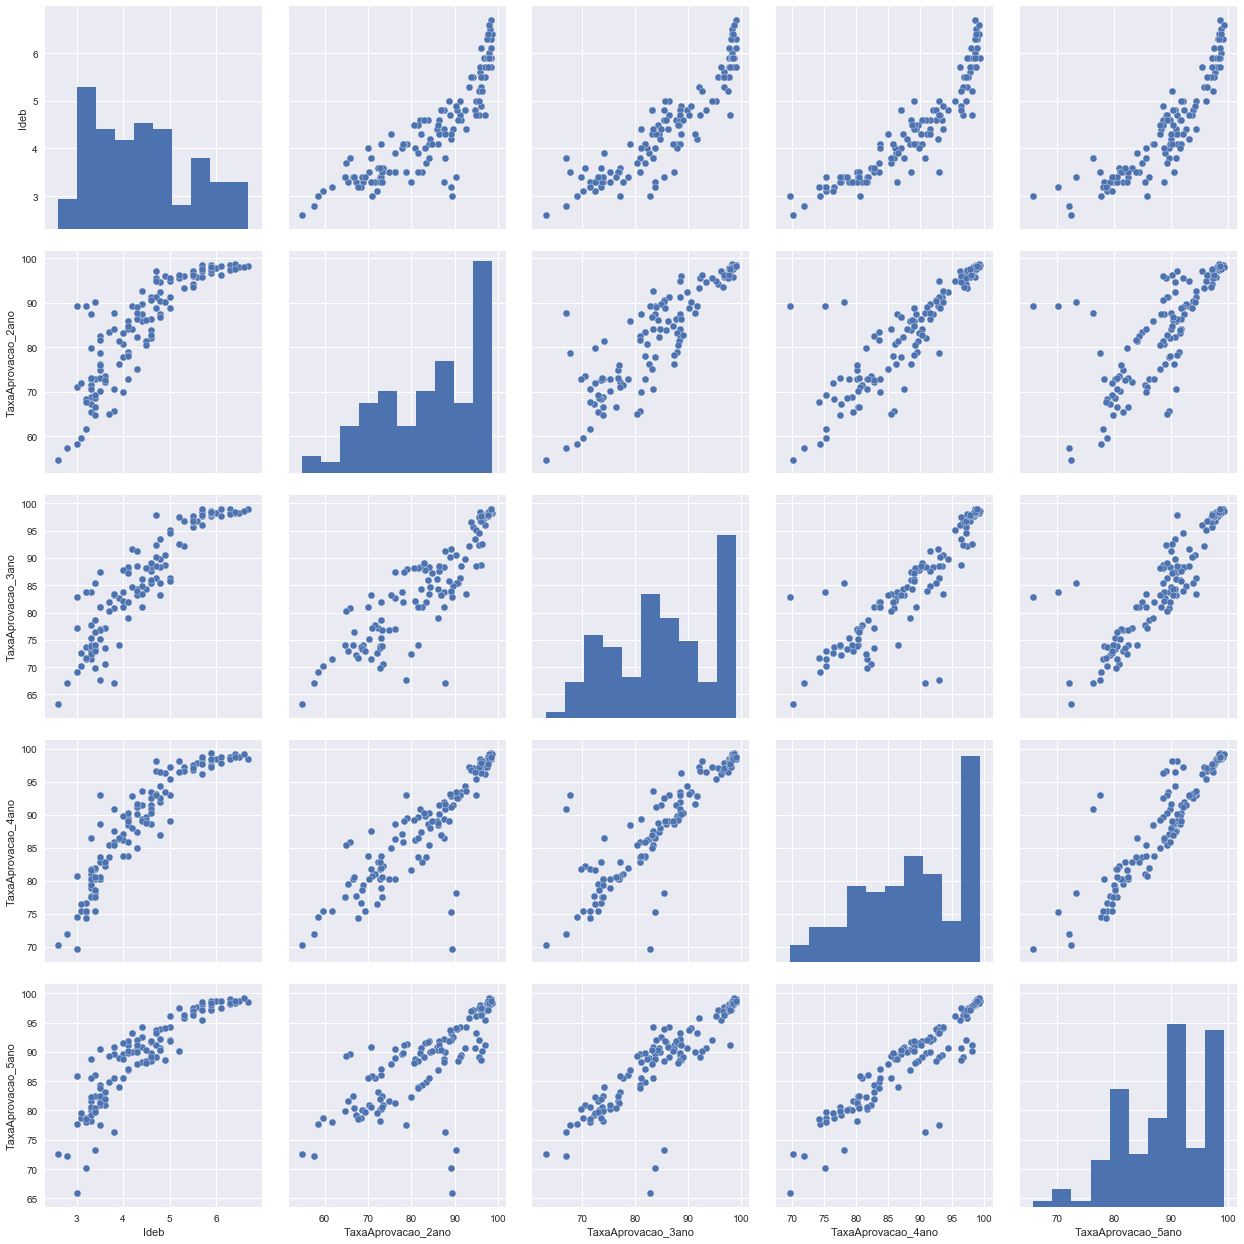

In [79]:
#scatterplot
categorical_features = dados2007_inic.select_dtypes(include = ["object"]).columns
numerical_features = dados2007_inic.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("Ideb")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
dados2007_inic_num = dados2007_inic[numerical_features]
dados2007_inic_cat = dados2007_inic[categorical_features]

sns.set()
cols = ['Ideb']
cols.extend(numerical_features[1:5].tolist())
sns.pairplot(dados2007_inic[cols], size = 3.5)
plt.show();

In [80]:
dados2007_fim = pd.DataFrame(regioes_anosfinais2005_2017.iloc[:,0:2])
dados2007_fim = pd.concat([dados2007_fim,regioes_anosfinais2005_2017.filter(like='2007')], axis=1)
dados2007_fim = dados2007_fim.rename(columns={"TaxaAprovacao2007_6ao9ano": "TaxaAprovacao_6ao9ano",
                                     "TaxaAprovacao2007_6ano": "TaxaAprovacao_6ano",
                                     "TaxaAprovacao2007_7ano": "TaxaAprovacao_7ano",
                                     "TaxaAprovacao2007_8ano": "TaxaAprovacao_8ano",
                                     "TaxaAprovacao2007_9ano": "TaxaAprovacao_9ano",
                                     "IndicadorRendimento_2007": "IndicadorRendimento_finais",
                                     "NotaProvaBrasil_MT_2007": "NotaProvaBrasil_MT_finais",
                                     "NotaProvaBrasil_LP_2007": "NotaProvaBrasil_LP_finais",
                                     "NotaProvaBrasil_NotaMedia_2007": "NotaProvaBrasil_NotaMedia_finais",
                                     "Ideb2007": "Ideb",
                                     "ProjecaoIdeb2007": "ProjecaoIdeb_finais"})
dados2007_fim

,UF_REG,Rede,TaxaAprovacao_6ao9ano,TaxaAprovacao_6ano,TaxaAprovacao_7ano,TaxaAprovacao_8ano,TaxaAprovacao_9ano,IndicadorRendimento_finais,NotaProvaBrasil_MT_finais,NotaProvaBrasil_LP_finais,NotaProvaBrasil_NotaMedia_finais,Ideb,ProjecaoIdeb_finais
0,Norte,Total,77.1,72.7,76.9,80.3,81.4,0.776739,235.82,227.32,4.385771,3.4,3.2
1,Norte,Pública,75.9,71.4,75.9,79.1,80.3,0.765164,232.23,224.12,4.272500,3.3,3.1
2,Norte,Privada,95.3,95.5,95.4,95.3,94.9,0.952745,274.03,261.38,5.590167,5.3,5.4
3,Norte,Estadual,76.0,72.5,75.3,78.4,79.5,0.763256,232.82,224.74,4.292667,3.3,3.1
4,Rondônia,Total,76.0,71.7,74.5,78.9,81.7,0.765053,241.78,228.41,4.503229,3.4,3.4
5,Rondônia,Pública,74.9,70.5,73.4,77.9,80.8,0.754410,238.88,226.27,4.419167,3.3,3.2
6,Rondônia,Privada,94.5,95.0,93.8,94.3,94.5,0.943980,272.08,250.86,5.382333,5.1,5.8
7,Rondônia,Estadual,73.2,69.5,71.1,76.1,78.3,0.735765,239.28,226.52,4.430000,3.3,3.2
8,Acre,Total,86.1,83.1,86.4,87.2,89.4,0.864653,236.36,227.23,4.393166,3.8,3.5
9,Acre,Pública,85.5,82.3,85.9,86.6,88.7,0.858122,233.02,224.32,4.289000,3.7,3.4


Numerical features : 10
Categorical features : 2


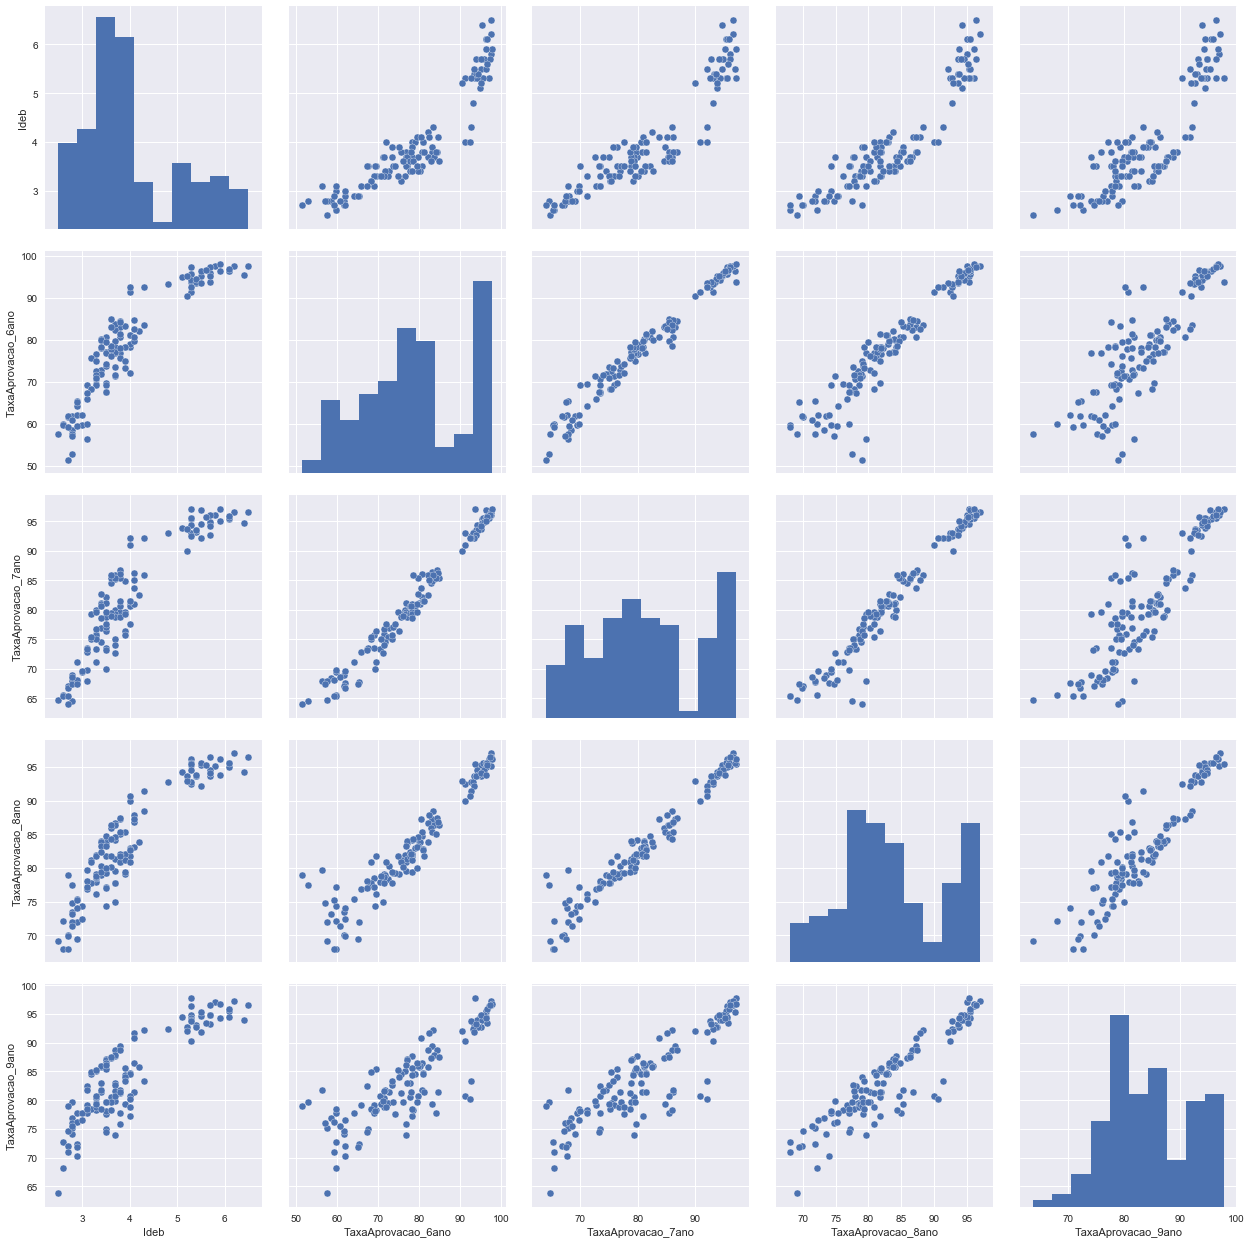

In [81]:
#scatterplot
categorical_features = dados2007_fim.select_dtypes(include = ["object"]).columns
numerical_features = dados2007_fim.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("Ideb")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
dados2007_fim_num = dados2007_fim[numerical_features]
dados2007_fim_cat = dados2007_fim[categorical_features]

sns.set()
cols = ['Ideb']
cols.extend(numerical_features[1:5].tolist())
sns.pairplot(dados2007_fim[cols], size = 3.5)
plt.show();

# Ano 2009

In [82]:
dados2009_inic = pd.DataFrame(regioes_anosiniciais2005_2017.iloc[:,0:2])
dados2009_inic = pd.concat([dados2009_inic,regioes_anosiniciais2005_2017.filter(like='2009')], axis=1)
dados2009_inic = dados2009_inic.rename(columns={"TaxaAprovacao2009_1ao5ano": "TaxaAprovacao_1ao5ano",
                                     "TaxaAprovacao2009_1ano": "TaxaAprovacao_1ano",
                                     "TaxaAprovacao2009_2ano": "TaxaAprovacao_2ano",
                                     "TaxaAprovacao2009_3ano": "TaxaAprovacao_3ano",
                                     "TaxaAprovacao2009_4ano": "TaxaAprovacao_4ano",
                                     "TaxaAprovacao2009_5ano": "TaxaAprovacao_5ano",
                                     "IndicadorRendimento_2009": "IndicadorRendimento_inicial",
                                     "NotaProvaBrasil_MT_2009": "NotaProvaBrasil_MT_inicial",
                                     "NotaProvaBrasil_LP_2009": "NotaProvaBrasil_LP_inicial",
                                     "NotaProvaBrasil_NotaMedia_2009": "NotaProvaBrasil_NotaMedia_inicial",
                                     "Ideb2009": "Ideb",
                                     "ProjecaoIdeb2009": "ProjecaoIdeb_inicial"})
dados2009_inic

,UF_REG,Rede,TaxaAprovacao_1ao5ano,TaxaAprovacao_1ano,TaxaAprovacao_2ano,TaxaAprovacao_3ano,TaxaAprovacao_4ano,TaxaAprovacao_5ano,IndicadorRendimento_inicial,NotaProvaBrasil_MT_inicial,NotaProvaBrasil_LP_inicial,NotaProvaBrasil_NotaMedia_inicial,Ideb,ProjecaoIdeb_inicial
0,Norte,Total,81.0,92.0,74.0,77.1,82.7,85.3,0.817415,188.25,172.26,4.692915802241128,3.8,3.4
1,Norte,Pública,80.1,91.6,72.9,76.0,81.8,84.6,0.808569,189.1,173.11,4.724618922975339,3.8,3.3
2,Norte,Privada,97.1,96.4,96.3,97.3,97.6,97.8,0.970761,225.85,211.15,6.118778426771691,5.9,5.9
3,Norte,Estadual,85.7,94.2,83.8,80.5,86.7,87.6,0.863248,192.83,176.64000000000001,4.86010157485667,4.2,3.6
4,Rondônia,Total,87.2,97.6,80.0,84.3,86.8,89.5,0.872567,196.97,178.18,4.967219102770108,4.3,4.0
5,Rondônia,Pública,86.5,97.6,79.0,83.5,86.0,89.0,0.865890,196.97,178.18,4.967219102770108,4.3,3.9
6,Rondônia,Privada,97.8,98.0,96.7,97.5,98.5,98.1,0.977561,-,-,-,-,6.0
7,Rondônia,Estadual,87.4,96.7,82.4,83.6,86.8,89.6,0.875345,199.72,180.84,5.068150877136361,4.4,4.0
8,Acre,Total,84.7,91.9,72.3,83.1,88.9,91.6,0.848724,195.98000000000002,182.20000000000002,5.021428733090169,4.3,3.8
9,Acre,Pública,84.1,91.6,71.5,82.5,88.4,91.3,0.843321,195.98000000000002,182.20000000000002,5.021428733090169,4.2,3.7


In [83]:
dados2009_inic = dados2009_inic[dados2009_inic['Ideb']!= '-']
dados2009_inic = dados2009_inic.reset_index()
dados2009_inic['Ideb'] = pd.to_numeric(dados2009_inic['Ideb'])

In [84]:
# Retirar outlier, TaxaAprovacao_1ano = 0
dados2009_inic = dados2009_inic.drop(dados2009_inic[dados2009_inic['TaxaAprovacao_1ano']==0].index[0])

Numerical features : 9
Categorical features : 5


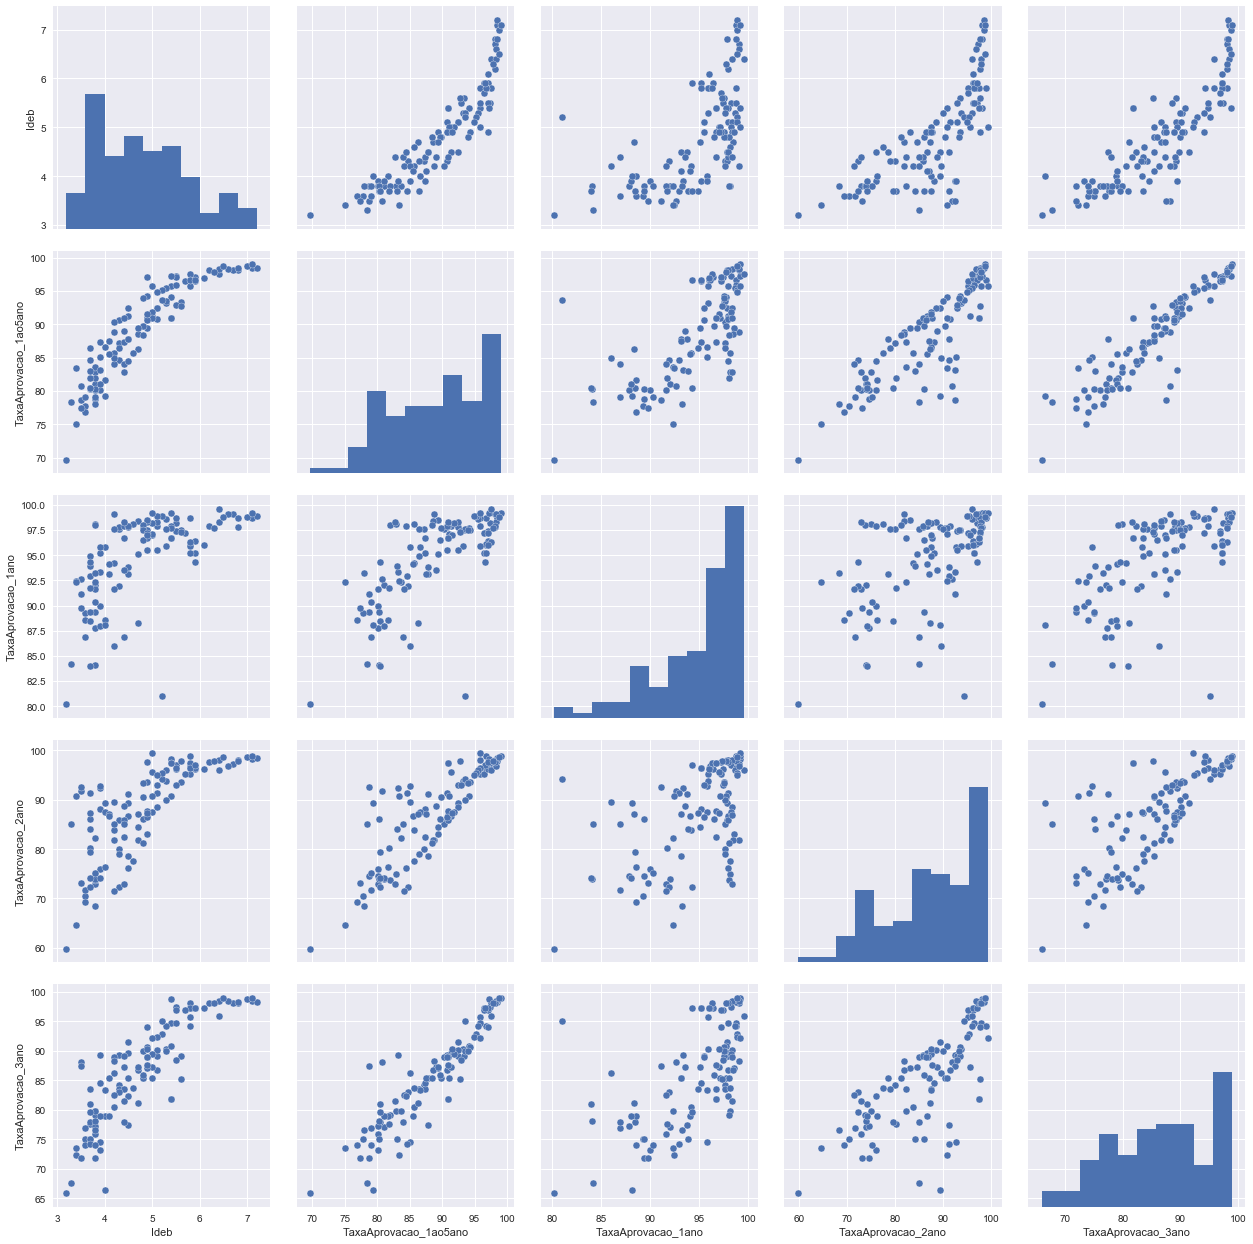

In [85]:
#scatterplot
categorical_features = dados2009_inic.select_dtypes(include = ["object"]).columns
numerical_features = dados2009_inic.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("Ideb")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
dados2009_inic_num = dados2009_inic[numerical_features]
dados2009_inic_cat = dados2009_inic[categorical_features]

sns.set()
cols = ['Ideb']
cols.extend(numerical_features[1:5].tolist())
sns.pairplot(dados2009_inic[cols], size = 3.5)
plt.show();

In [86]:
dados2009_fim = pd.DataFrame(regioes_anosfinais2005_2017.iloc[:,0:2])
dados2009_fim = pd.concat([dados2009_fim,regioes_anosfinais2005_2017.filter(like='2009')], axis=1)
dados2009_fim = dados2009_fim.rename(columns={"TaxaAprovacao2009_6ao9ano": "TaxaAprovacao_6ao9ano",
                                     "TaxaAprovacao2009_6ano": "TaxaAprovacao_6ano",
                                     "TaxaAprovacao2009_7ano": "TaxaAprovacao_7ano",
                                     "TaxaAprovacao2009_8ano": "TaxaAprovacao_8ano",
                                     "TaxaAprovacao2009_9ano": "TaxaAprovacao_9ano",
                                     "IndicadorRendimento_2009": "IndicadorRendimento_finais",
                                     "NotaProvaBrasil_MT_2009": "NotaProvaBrasil_MT_finais",
                                     "NotaProvaBrasil_LP_2009": "NotaProvaBrasil_LP_finais",
                                     "NotaProvaBrasil_NotaMedia_2009": "NotaProvaBrasil_NotaMedia_finais",
                                     "Ideb2009": "Ideb",
                                     "ProjecaoIdeb2009": "ProjecaoIdeb_finais"})
dados2009_fim

,UF_REG,Rede,TaxaAprovacao_6ao9ano,TaxaAprovacao_6ano,TaxaAprovacao_7ano,TaxaAprovacao_8ano,TaxaAprovacao_9ano,IndicadorRendimento_finais,NotaProvaBrasil_MT_finais,NotaProvaBrasil_LP_finais,NotaProvaBrasil_NotaMedia_finais,Ideb,ProjecaoIdeb_finais
0,Norte,Total,79.2,74.9,79.2,82.0,82.9,0.796254,236.33,237.19,4.558666666666666,3.6,3.4
1,Norte,Pública,78.2,73.8,78.2,81.1,82.0,0.786420,232.96,234.75,4.461833333333333,3.5,3.2
2,Norte,Privada,95.1,95.2,95.0,95.3,94.7,0.950494,271.59000000000003,262.69,5.5713333333333335,5.3,5.5
3,Norte,Estadual,77.9,74.5,77.8,79.9,80.2,0.780324,233.69,235.53,4.487,3.5,3.3
4,Rondônia,Total,76.1,70.9,74.9,78.8,82.2,0.764653,240.26,237.48000000000002,4.629,3.5,3.6
5,Rondônia,Pública,75.0,69.8,73.8,77.8,81.3,0.754285,240.26,237.48000000000002,4.629,3.5,3.3
6,Rondônia,Privada,94.3,94.7,93.5,95.2,93.9,0.943203,-,-,-,-,6.0
7,Rondônia,Estadual,73.5,68.8,72.3,75.8,78.9,0.737558,240.56,237.91,4.641166666666667,3.4,3.4
8,Acre,Total,88.4,86.0,89.3,90.7,88.7,0.886418,237.28,239.49,4.612833333333334,4.1,3.7
9,Acre,Pública,88.0,85.6,88.9,90.3,88.4,0.882666,237.28,239.49,4.612833333333334,4.1,3.6


In [87]:
dados2009_fim = dados2009_fim[dados2009_fim['Ideb']!= '-']
dados2009_fim = dados2009_fim.reset_index()
dados2009_fim['Ideb'] = pd.to_numeric(dados2009_fim['Ideb'])

Numerical features : 8
Categorical features : 5


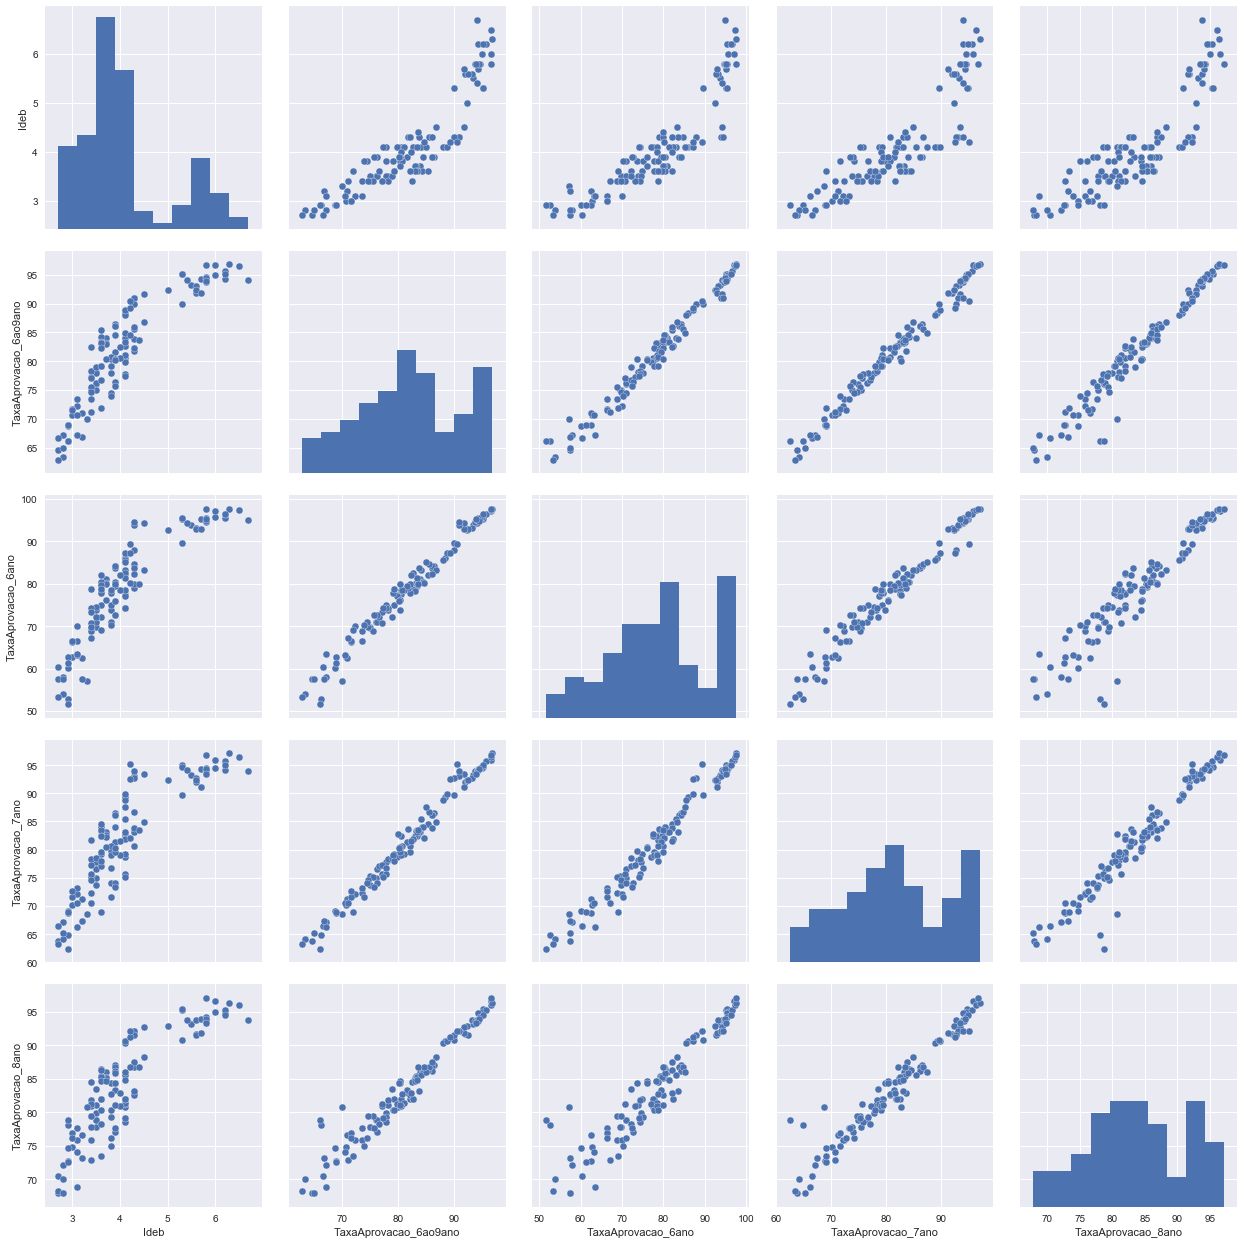

In [88]:
#scatterplot
categorical_features = dados2009_fim.select_dtypes(include = ["object"]).columns
numerical_features = dados2009_fim.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("Ideb")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
dados2009_fim_num = dados2009_fim[numerical_features]
dados2009_fim_cat = dados2009_fim[categorical_features]

sns.set()
cols = ['Ideb']
cols.extend(numerical_features[1:5].tolist())
sns.pairplot(dados2009_fim[cols], size = 3.5)
plt.show();

# Ano 2011

In [89]:
dados2011_inic = pd.DataFrame(regioes_anosiniciais2005_2017.iloc[:,0:2])
dados2011_inic = pd.concat([dados2011_inic,regioes_anosiniciais2005_2017.filter(like='2011')], axis=1)
dados2011_inic = dados2011_inic.rename(columns={"TaxaAprovacao2011_1ao5ano": "TaxaAprovacao_1ao5ano",
                                     "TaxaAprovacao2011_1ano": "TaxaAprovacao_1ano",
                                     "TaxaAprovacao2011_2ano": "TaxaAprovacao_2ano",
                                     "TaxaAprovacao2011_3ano": "TaxaAprovacao_3ano",
                                     "TaxaAprovacao2011_4ano": "TaxaAprovacao_4ano",
                                     "TaxaAprovacao2011_5ano": "TaxaAprovacao_5ano",
                                     "IndicadorRendimento_2011": "IndicadorRendimento_inicial",
                                     "NotaProvaBrasil_MT_2011": "NotaProvaBrasil_MT_inicial",
                                     "NotaProvaBrasil_LP_2011": "NotaProvaBrasil_LP_inicial",
                                     "NotaProvaBrasil_NotaMedia_2011": "NotaProvaBrasil_NotaMedia_inicial",
                                     "Ideb2011": "Ideb",
                                     "ProjecaoIdeb2011": "ProjecaoIdeb_inicial"})
dados2011_inic

,UF_REG,Rede,TaxaAprovacao_1ao5ano,TaxaAprovacao_1ano,TaxaAprovacao_2ano,TaxaAprovacao_3ano,TaxaAprovacao_4ano,TaxaAprovacao_5ano,IndicadorRendimento_inicial,NotaProvaBrasil_MT_inicial,NotaProvaBrasil_LP_inicial,NotaProvaBrasil_NotaMedia_inicial,Ideb,ProjecaoIdeb_inicial
0,Norte,Total,87.0,95.2,86.8,82.1,85.7,86.9,0.871364,191.53,176.66,4.835626,4.2,3.8
1,Norte,Pública,86.2,95.0,86.1,81.1,84.9,86.1,0.864093,192.70,177.84,4.879446,4.2,3.7
2,Norte,Privada,97.7,97.1,97.6,98.0,98.0,97.9,0.977188,228.08,213.87,6.210866,6.1,6.2
3,Norte,Estadual,89.6,97.0,90.7,82.7,92.2,88.6,0.899941,196.01,180.57,4.992351,4.5,4.1
4,Rondônia,Total,88.9,98.5,82.7,86.6,88.7,90.3,0.890636,204.99,187.36,5.287448,4.7,4.5
5,Rondônia,Pública,88.2,98.5,81.7,85.8,88.0,89.8,0.884225,202.20,184.31,5.178658,4.6,4.3
6,Rondônia,Privada,98.1,99.1,96.7,98.2,98.5,98.0,0.980936,235.93,221.10,6.492375,6.4,6.4
7,Rondônia,Estadual,87.9,98.4,82.2,85.9,87.8,88.9,0.883273,205.65,187.55,5.303515,4.7,4.4
8,Acre,Total,87.7,95.4,79.0,85.2,89.3,92.5,0.878943,202.08,187.42,5.232938,4.6,4.3
9,Acre,Pública,87.3,95.3,78.3,84.7,88.9,92.2,0.874653,200.24,185.21,5.157579,4.5,4.1


Numerical features : 11
Categorical features : 2


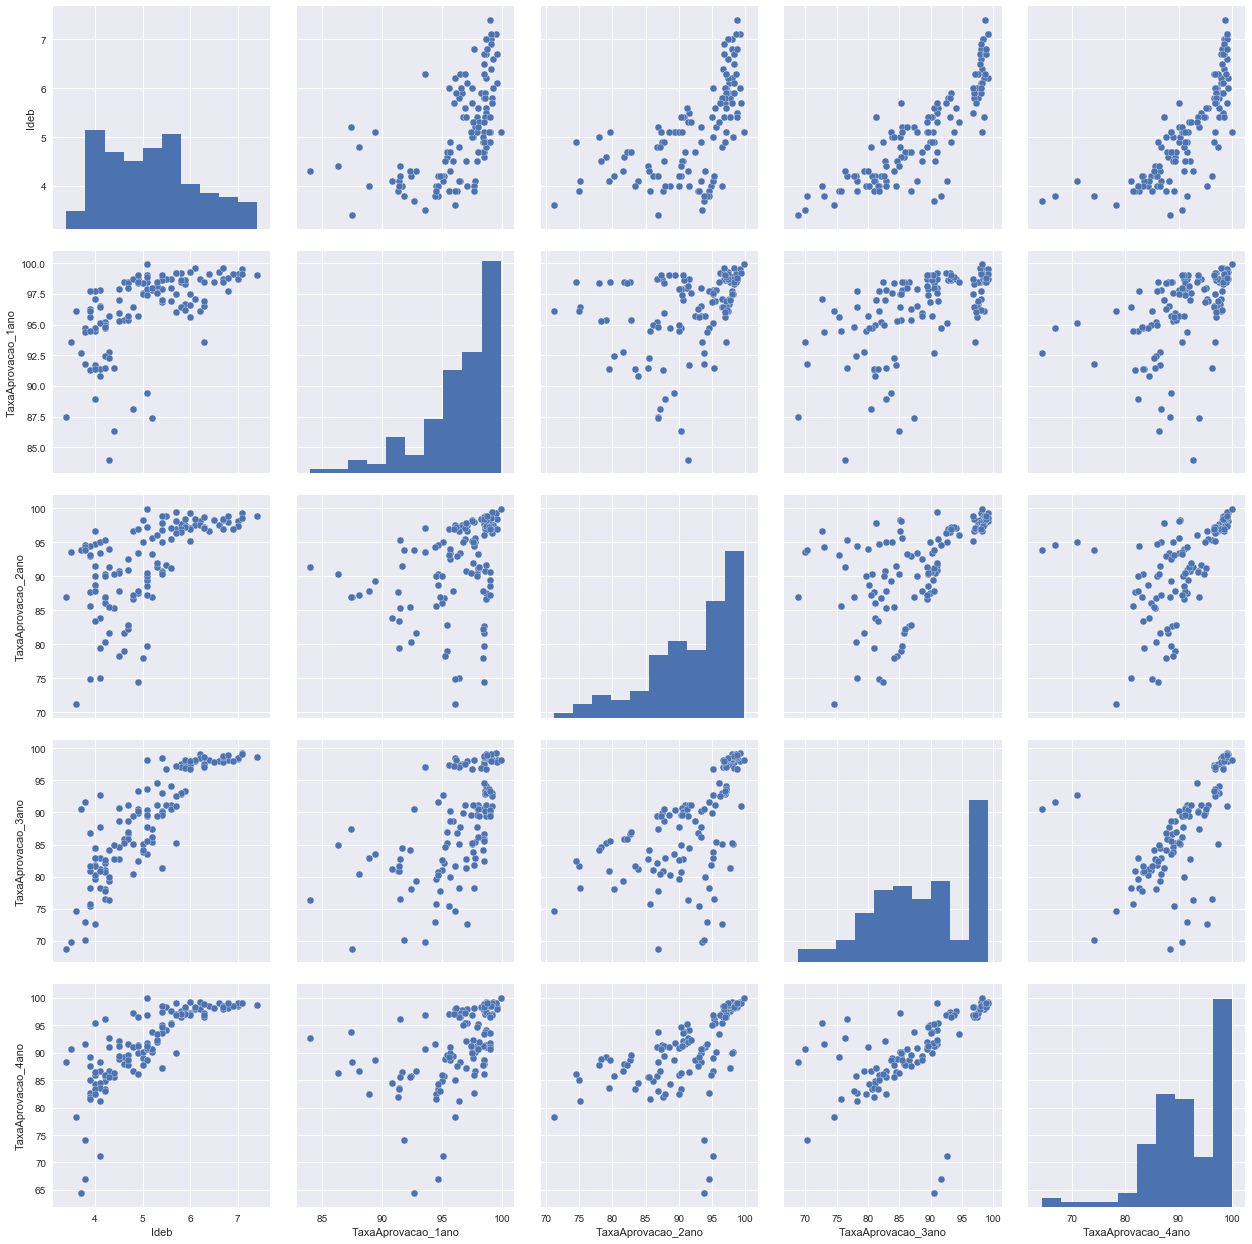

In [90]:
#scatterplot
categorical_features = dados2011_inic.select_dtypes(include = ["object"]).columns
numerical_features = dados2011_inic.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("Ideb")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
dados2011_inic_num = dados2011_inic[numerical_features]
dados2011_inic_cat = dados2011_inic[categorical_features]

sns.set()
cols = ['Ideb']
cols.extend(numerical_features[1:5].tolist())
sns.pairplot(dados2011_inic[cols], size = 3.5)
plt.show();

In [91]:
dados2011_fim = pd.DataFrame(regioes_anosfinais2005_2017.iloc[:,0:2])
dados2011_fim = pd.concat([dados2011_fim,regioes_anosfinais2005_2017.filter(like='2011')], axis=1)
dados2011_fim = dados2011_fim.rename(columns={"TaxaAprovacao2011_6ao9ano": "TaxaAprovacao_6ao9ano",
                                     "TaxaAprovacao2011_6ano": "TaxaAprovacao_6ano",
                                     "TaxaAprovacao2011_7ano": "TaxaAprovacao_7ano",
                                     "TaxaAprovacao2011_8ano": "TaxaAprovacao_8ano",
                                     "TaxaAprovacao2011_9ano": "TaxaAprovacao_9ano",
                                     "IndicadorRendimento_2011": "IndicadorRendimento_finais",
                                     "NotaProvaBrasil_MT_2011": "NotaProvaBrasil_MT_finais",
                                     "NotaProvaBrasil_LP_2011": "NotaProvaBrasil_LP_finais",
                                     "NotaProvaBrasil_NotaMedia_2011": "NotaProvaBrasil_NotaMedia_finais",
                                     "Ideb2011": "Ideb",
                                     "ProjecaoIdeb2011": "ProjecaoIdeb_finais"})
dados2011_fim

,UF_REG,Rede,TaxaAprovacao_6ao9ano,TaxaAprovacao_6ano,TaxaAprovacao_7ano,TaxaAprovacao_8ano,TaxaAprovacao_9ano,IndicadorRendimento_finais,NotaProvaBrasil_MT_finais,NotaProvaBrasil_LP_finais,NotaProvaBrasil_NotaMedia_finais,Ideb,ProjecaoIdeb_finais
0,Norte,Total,81.7,77.7,81.4,84.2,85.4,0.820662,240.46,236.97,4.623833,3.8,3.6
1,Norte,Pública,80.7,76.6,80.5,83.4,84.6,0.811558,235.94,232.96,4.481667,3.6,3.5
2,Norte,Privada,94.9,95.3,94.8,94.7,94.8,0.948994,281.01,272.90,5.898500,5.6,5.8
3,Norte,Estadual,80.4,77.4,79.9,82.1,83.1,0.805648,236.56,233.38,4.499000,3.6,3.5
4,Rondônia,Total,75.7,70.3,73.9,78.3,83.1,0.761011,250.50,243.16,4.894333,3.7,3.8
5,Rondônia,Pública,74.6,68.8,72.7,77.4,82.3,0.749617,246.81,239.77,4.776333,3.6,3.6
6,Rondônia,Privada,93.4,95.4,92.6,91.8,94.0,0.934299,289.31,278.84,6.135833,5.7,6.2
7,Rondônia,Estadual,72.4,67.0,70.4,74.9,79.9,0.727316,246.74,240.06,4.780000,3.5,3.6
8,Acre,Total,90.0,87.5,89.8,91.5,92.1,0.901893,243.34,238.74,4.701333,4.2,4.0
9,Acre,Pública,89.7,87.0,89.5,91.3,91.9,0.898841,240.02,235.78,4.596667,4.1,3.8


Numerical features : 10
Categorical features : 2


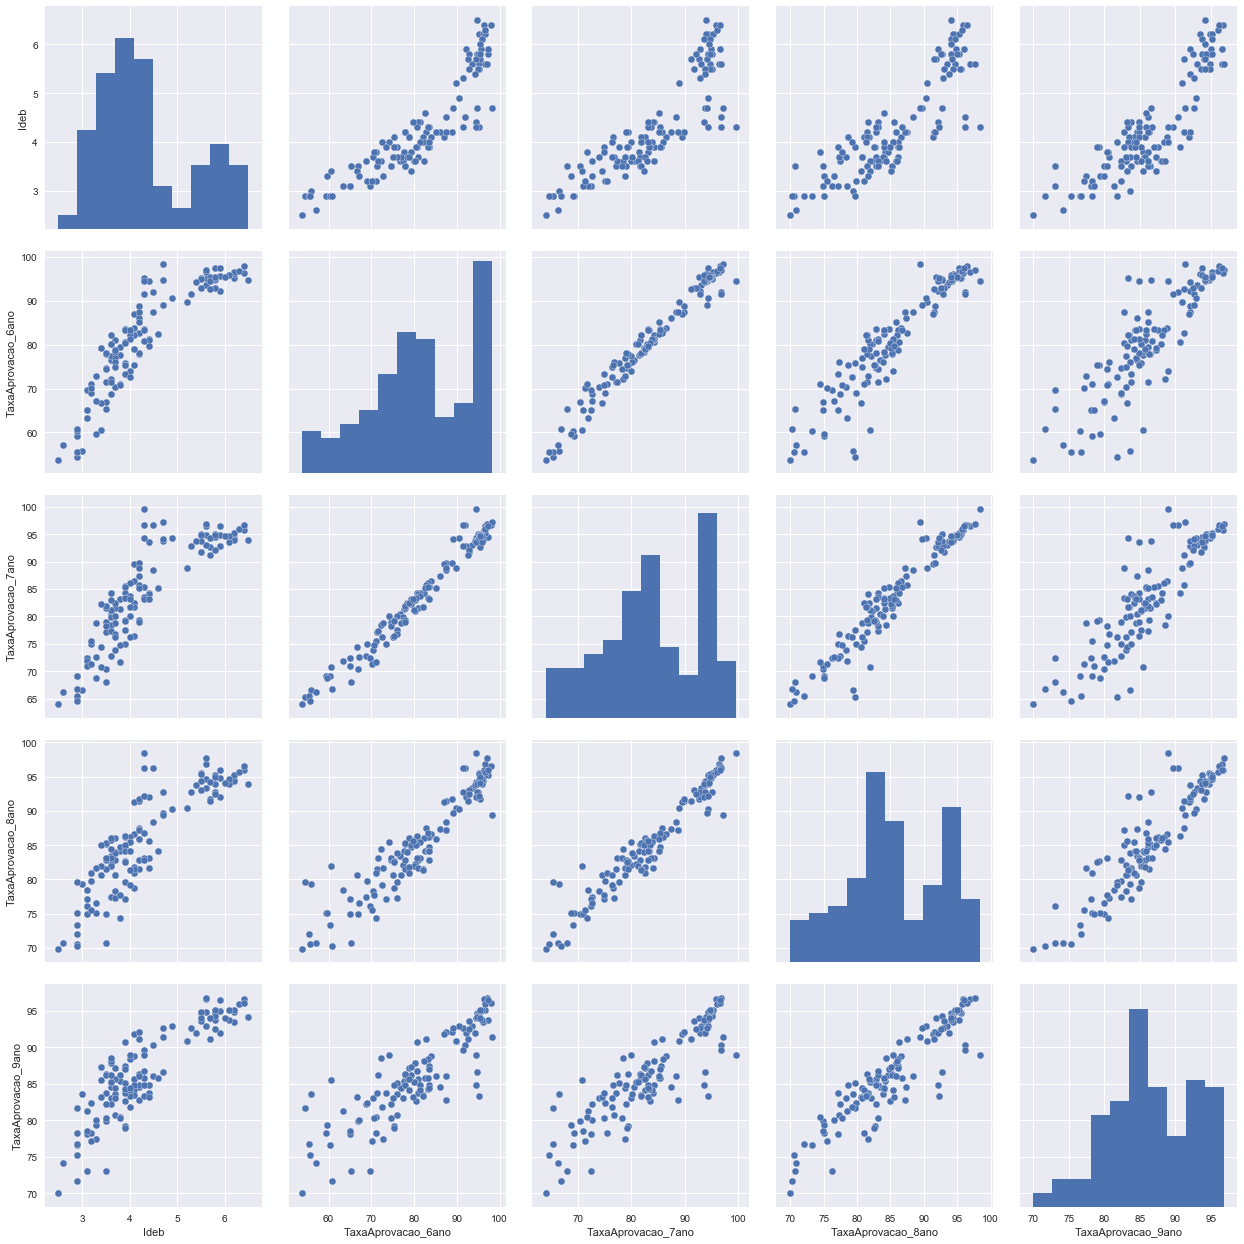

In [92]:
#scatterplot
categorical_features = dados2011_fim.select_dtypes(include = ["object"]).columns
numerical_features = dados2011_fim.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("Ideb")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
dados2011_fim_num = dados2011_fim[numerical_features]
dados2011_fim_cat = dados2011_fim[categorical_features]

sns.set()
cols = ['Ideb']
cols.extend(numerical_features[1:5].tolist())
sns.pairplot(dados2011_fim[cols], size = 3.5)
plt.show();

# Ano 2013

In [93]:
dados2013_inic = pd.DataFrame(regioes_anosiniciais2005_2017.iloc[:,0:2])
dados2013_inic = pd.concat([dados2013_inic,regioes_anosiniciais2005_2017.filter(like='2013')], axis=1)
dados2013_inic = dados2013_inic.rename(columns={"TaxaAprovacao2013_1ao5ano": "TaxaAprovacao_1ao5ano",
                                     "TaxaAprovacao2013_1ano": "TaxaAprovacao_1ano",
                                     "TaxaAprovacao2013_2ano": "TaxaAprovacao_2ano",
                                     "TaxaAprovacao2013_3ano": "TaxaAprovacao_3ano",
                                     "TaxaAprovacao2013_4ano": "TaxaAprovacao_4ano",
                                     "TaxaAprovacao2013_5ano": "TaxaAprovacao_5ano",
                                     "IndicadorRendimento_2013": "IndicadorRendimento_inicial",
                                     "NotaProvaBrasil_MT_2013": "NotaProvaBrasil_MT_inicial",
                                     "NotaProvaBrasil_LP_2013": "NotaProvaBrasil_LP_inicial",
                                     "NotaProvaBrasil_NotaMedia_2013": "NotaProvaBrasil_NotaMedia_inicial",
                                     "Ideb2013": "Ideb",
                                     "ProjecaoIdeb2013": "ProjecaoIdeb_inicial"})
dados2013_inic

,UF_REG,Rede,TaxaAprovacao_1ao5ano,TaxaAprovacao_1ano,TaxaAprovacao_2ano,TaxaAprovacao_3ano,TaxaAprovacao_4ano,TaxaAprovacao_5ano,IndicadorRendimento_inicial,NotaProvaBrasil_MT_inicial,NotaProvaBrasil_LP_inicial,NotaProvaBrasil_NotaMedia_inicial,Ideb,ProjecaoIdeb_inicial
0,Norte,Total,88.6,96.5,93.2,83.8,85.7,85.4,0.886467,188.88,177.26,4.795906,4.3,4.1
1,Norte,Pública,87.8,96.4,92.7,82.8,84.8,84.4,0.879059,191.09,178.91,4.868147,4.3,4.0
2,Norte,Privada,98.1,98.1,98.3,98.0,98.0,98.1,0.980999,225.86,218.49,6.252488,6.1,6.4
3,Norte,Estadual,90.7,97.4,95.5,84.7,93.0,87.1,0.912771,197.44,184.90,5.098440,4.7,4.3
4,Rondônia,Total,93.0,98.5,95.5,89.7,89.9,92.2,0.930385,213.10,196.30,5.605032,5.2,4.7
5,Rondônia,Pública,92.6,98.4,95.3,89.1,89.2,91.8,0.926215,210.95,193.95,5.521203,5.1,4.6
6,Rondônia,Privada,98.9,99.7,98.3,98.5,99.2,98.9,0.989175,237.69,223.11,6.562567,6.5,6.6
7,Rondônia,Estadual,92.9,98.1,96.0,89.5,90.8,92.3,0.932297,218.46,201.00,5.792942,5.4,4.7
8,Acre,Total,89.9,97.3,82.3,88.3,91.0,92.3,0.899662,211.20,198.83,5.614750,5.1,4.5
9,Acre,Pública,89.6,97.2,81.6,87.8,90.6,92.0,0.895422,209.54,196.92,5.548288,5.0,4.4


Numerical features : 11
Categorical features : 2


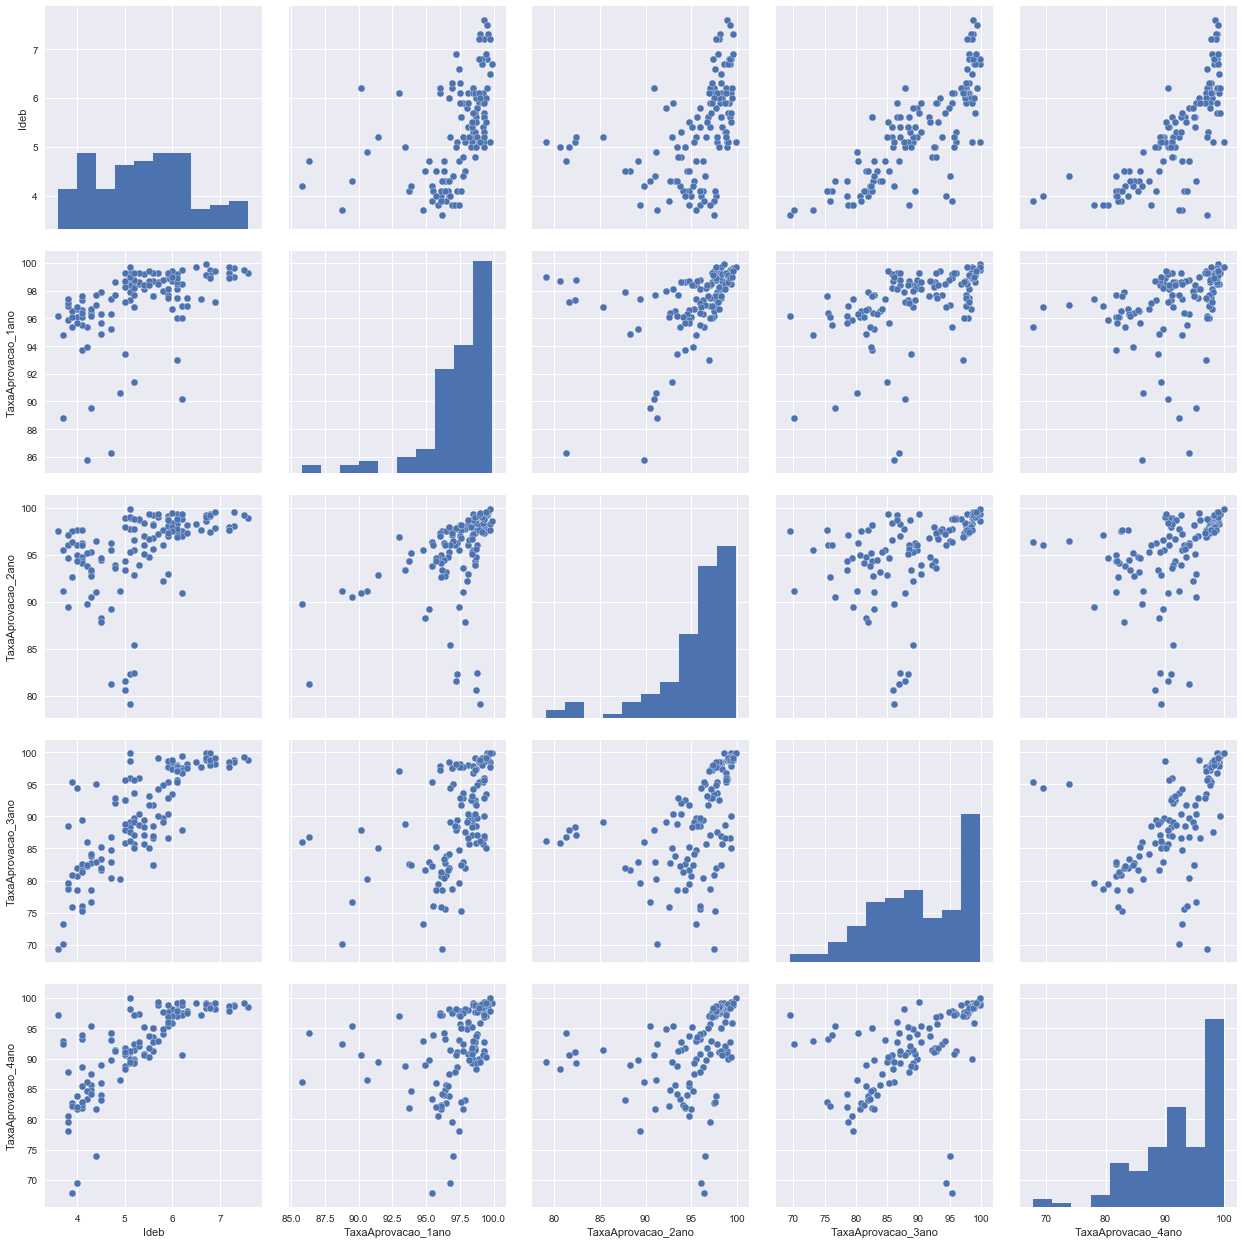

In [94]:
#scatterplot
categorical_features = dados2013_inic.select_dtypes(include = ["object"]).columns
numerical_features = dados2013_inic.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("Ideb")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
dados2013_inic_num = dados2013_inic[numerical_features]
dados2013_inic_cat = dados2013_inic[categorical_features]

sns.set()
cols = ['Ideb']
cols.extend(numerical_features[1:5].tolist())
sns.pairplot(dados2013_inic[cols], size = 3.5)
plt.show();

In [95]:
dados2013_fim = pd.DataFrame(regioes_anosfinais2005_2017.iloc[:,0:2])
dados2013_fim = pd.concat([dados2013_fim,regioes_anosfinais2005_2017.filter(like='2013')], axis=1)
dados2013_fim = dados2013_fim.rename(columns={"TaxaAprovacao2013_6ao9ano": "TaxaAprovacao_6ao9ano",
                                     "TaxaAprovacao2013_6ano": "TaxaAprovacao_6ano",
                                     "TaxaAprovacao2013_7ano": "TaxaAprovacao_7ano",
                                     "TaxaAprovacao2013_8ano": "TaxaAprovacao_8ano",
                                     "TaxaAprovacao2013_9ano": "TaxaAprovacao_9ano",
                                     "IndicadorRendimento_2013": "IndicadorRendimento_finais",
                                     "NotaProvaBrasil_MT_2013": "NotaProvaBrasil_MT_finais",
                                     "NotaProvaBrasil_LP_2013": "NotaProvaBrasil_LP_finais",
                                     "NotaProvaBrasil_NotaMedia_2013": "NotaProvaBrasil_NotaMedia_finais",
                                     "Ideb2013": "Ideb",
                                     "ProjecaoIdeb2013": "ProjecaoIdeb_finais"})
dados2013_fim

,UF_REG,Rede,TaxaAprovacao_6ao9ano,TaxaAprovacao_6ano,TaxaAprovacao_7ano,TaxaAprovacao_8ano,TaxaAprovacao_9ano,IndicadorRendimento_finais,NotaProvaBrasil_MT_finais,NotaProvaBrasil_LP_finais,NotaProvaBrasil_NotaMedia_finais,Ideb,ProjecaoIdeb_finais
0,Norte,Total,81.7,77.6,81.2,84.3,85.3,0.819881,238.81,238.68,4.624833,3.8,4.1
1,Norte,Pública,80.6,76.4,80.2,83.3,84.4,0.809537,234.65,234.72,4.489500,3.6,3.9
2,Norte,Privada,94.9,94.9,94.1,95.3,95.2,0.948727,273.38,271.51,5.748167,5.5,6.1
3,Norte,Estadual,80.4,77.6,79.8,82.3,82.6,0.805232,235.37,235.20,4.509500,3.6,3.9
4,Rondônia,Total,80.0,77.3,77.7,81.3,84.8,0.801616,248.18,243.16,4.855667,3.9,4.2
5,Rondônia,Pública,79.1,76.3,76.7,80.3,84.1,0.792269,244.98,240.38,4.756000,3.8,4.0
6,Rondônia,Privada,93.9,95.7,93.4,93.5,93.3,0.939645,281.73,272.24,5.899500,5.5,6.5
7,Rondônia,Estadual,78.5,76.8,76.8,79.2,81.8,0.785965,244.86,240.43,4.754833,3.7,4.0
8,Acre,Total,90.8,88.9,90.2,91.5,92.9,0.908507,244.56,246.48,4.850667,4.4,4.4
9,Acre,Pública,90.5,88.5,89.9,91.2,92.6,0.905245,241.94,244.18,4.768667,4.3,4.2


Numerical features : 10
Categorical features : 2


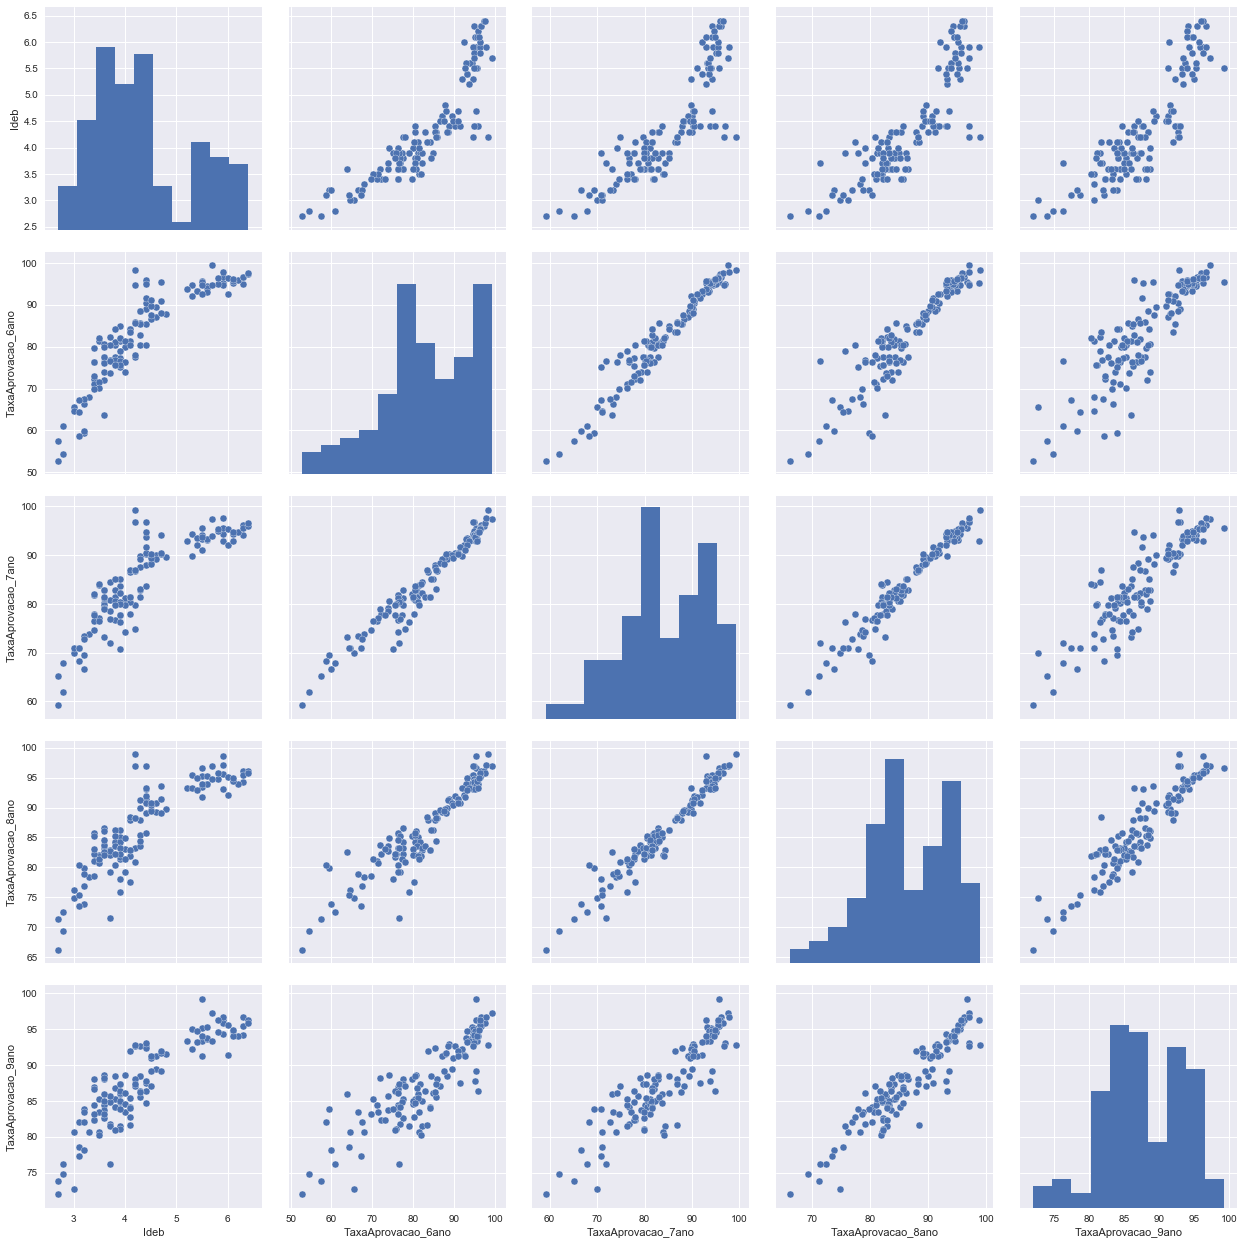

In [96]:
#scatterplot
categorical_features = dados2013_fim.select_dtypes(include = ["object"]).columns
numerical_features = dados2013_fim.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("Ideb")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
dados2013_fim_num = dados2013_fim[numerical_features]
dados2013_fim_cat = dados2013_fim[categorical_features]

sns.set()
cols = ['Ideb']
cols.extend(numerical_features[1:5].tolist())
sns.pairplot(dados2013_fim[cols], size = 3.5)
plt.show();

# Ano 2015

In [97]:
dados2015_inic = pd.DataFrame(regioes_anosiniciais2005_2017.iloc[:,0:2])
dados2015_inic = pd.concat([dados2015_inic,regioes_anosiniciais2005_2017.filter(like='2015')], axis=1)
dados2015_inic = dados2015_inic.rename(columns={"TaxaAprovacao2015_1ao5ano": "TaxaAprovacao_1ao5ano",
                                     "TaxaAprovacao2015_1ano": "TaxaAprovacao_1ano",
                                     "TaxaAprovacao2015_2ano": "TaxaAprovacao_2ano",
                                     "TaxaAprovacao2015_3ano": "TaxaAprovacao_3ano",
                                     "TaxaAprovacao2015_4ano": "TaxaAprovacao_4ano",
                                     "TaxaAprovacao2015_5ano": "TaxaAprovacao_5ano",
                                     "IndicadorRendimento_2015": "IndicadorRendimento_inicial",
                                     "NotaProvaBrasil_MT_2015": "NotaProvaBrasil_MT_inicial",
                                     "NotaProvaBrasil_LP_2015": "NotaProvaBrasil_LP_inicial",
                                     "NotaProvaBrasil_NotaMedia_2015": "NotaProvaBrasil_NotaMedia_inicial",
                                     "Ideb2015": "Ideb",
                                     "ProjecaoIdeb2015": "ProjecaoIdeb_inicial"})
dados2015_inic

,UF_REG,Rede,TaxaAprovacao_1ao5ano,TaxaAprovacao_1ano,TaxaAprovacao_2ano,TaxaAprovacao_3ano,TaxaAprovacao_4ano,TaxaAprovacao_5ano,IndicadorRendimento_inicial,NotaProvaBrasil_MT_inicial,NotaProvaBrasil_LP_inicial,NotaProvaBrasil_NotaMedia_inicial,Ideb,ProjecaoIdeb_inicial
0,Norte,Total,88.9,97.0,95.6,83.1,85.5,85.6,0.889975,201.22,190.26,5.268167,4.7,4.4
1,Norte,Pública,88.1,96.8,95.3,81.9,84.5,84.6,0.882014,201.80,191.64,5.304352,4.7,4.3
2,Norte,Privada,98.3,98.6,98.6,98.0,98.1,98.1,0.982793,231.63,226.26,6.504077,6.4,6.7
3,Norte,Estadual,90.6,96.7,95.6,83.9,92.2,88.3,0.910888,207.77,198.16,5.537024,5.0,4.6
4,Rondônia,Total,92.7,98.3,98.6,85.2,88.9,92.5,0.924019,217.81,207.17,5.892758,5.4,5.0
5,Rondônia,Pública,92.1,98.2,98.5,84.2,88.1,92.0,0.918571,215.23,204.49,5.794711,5.3,4.9
6,Rondônia,Privada,99.1,99.5,99.4,98.6,99.0,98.9,0.990789,242.61,232.92,6.835024,6.8,6.8
7,Rondônia,Estadual,92.8,98.4,98.7,86.3,90.2,93.3,0.931335,222.64,211.87,6.070541,5.7,5.0
8,Acre,Total,90.3,97.8,83.6,87.9,90.9,93.3,0.904446,220.66,209.04,5.981230,5.4,4.8
9,Acre,Pública,89.9,97.8,83.0,87.4,90.6,92.9,0.900632,218.43,206.43,5.891143,5.3,4.7


Numerical features : 11
Categorical features : 2


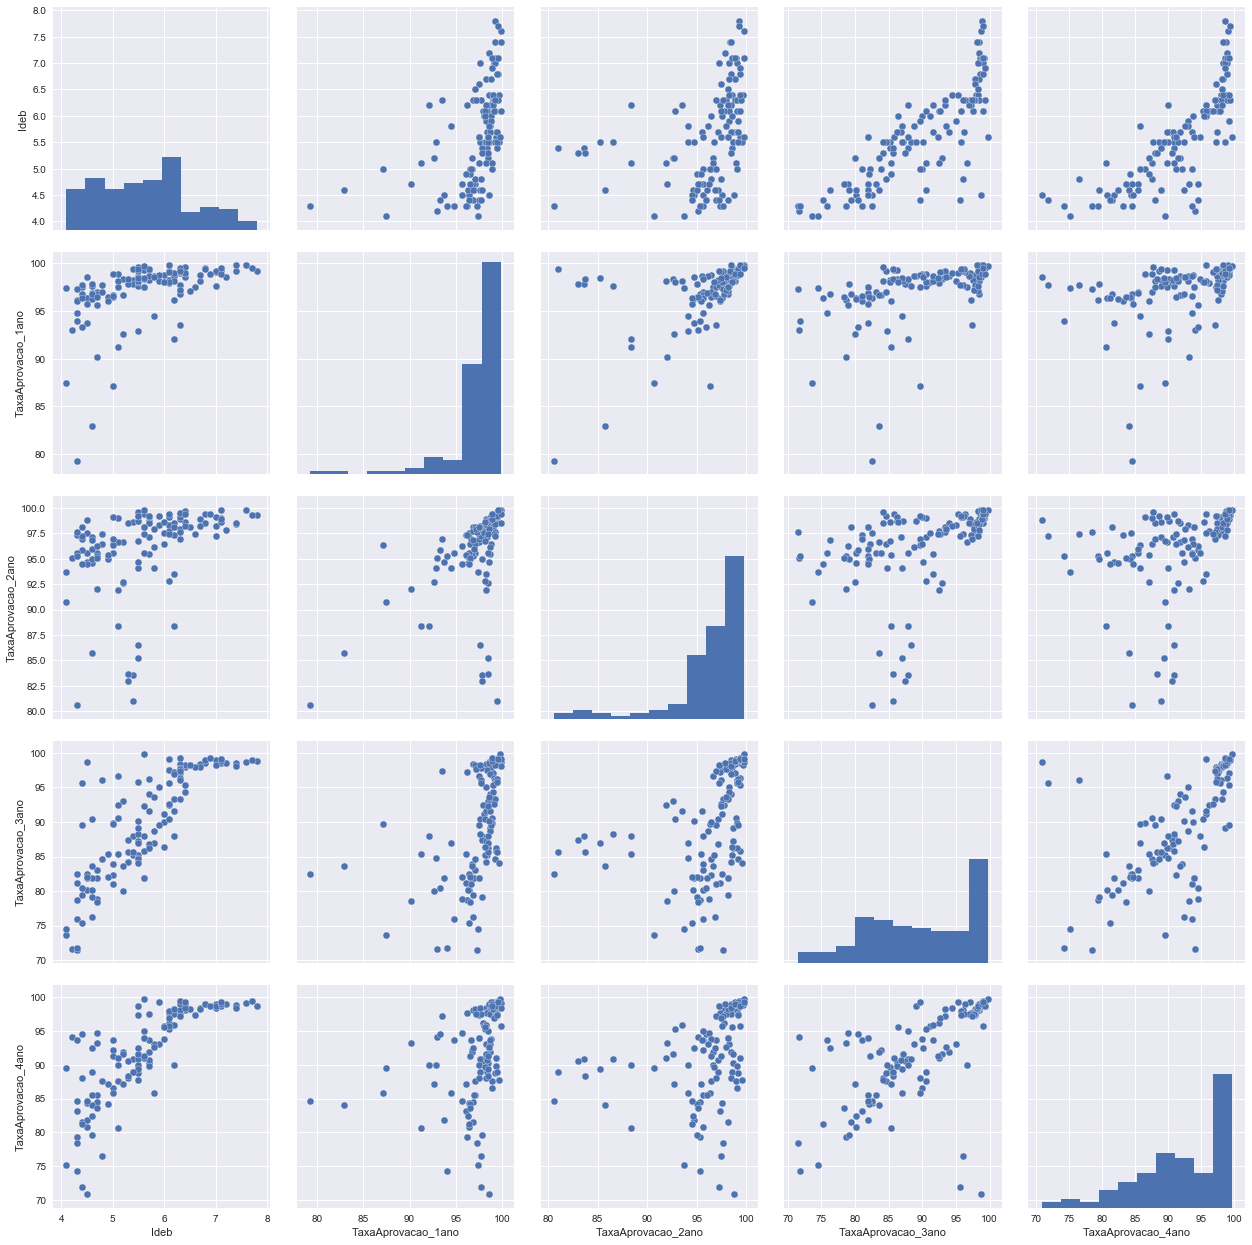

In [98]:
#scatterplot
categorical_features = dados2015_inic.select_dtypes(include = ["object"]).columns
numerical_features = dados2015_inic.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("Ideb")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
dados2015_inic_num = dados2015_inic[numerical_features]
dados2015_inic_cat = dados2015_inic[categorical_features]

sns.set()
cols = ['Ideb']
cols.extend(numerical_features[1:5].tolist())
sns.pairplot(dados2015_inic[cols], size = 3.5)
plt.show();

In [99]:
dados2015_fim = pd.DataFrame(regioes_anosfinais2005_2017.iloc[:,0:2])
dados2015_fim = pd.concat([dados2015_fim,regioes_anosfinais2005_2017.filter(like='2015')], axis=1)
dados2015_fim = dados2015_fim.rename(columns={"TaxaAprovacao2015_6ao9ano": "TaxaAprovacao_6ao9ano",
                                     "TaxaAprovacao2015_6ano": "TaxaAprovacao_6ano",
                                     "TaxaAprovacao2015_7ano": "TaxaAprovacao_7ano",
                                     "TaxaAprovacao2015_8ano": "TaxaAprovacao_8ano",
                                     "TaxaAprovacao2015_9ano": "TaxaAprovacao_9ano",
                                     "IndicadorRendimento_2015": "IndicadorRendimento_finais",
                                     "NotaProvaBrasil_MT_2015": "NotaProvaBrasil_MT_finais",
                                     "NotaProvaBrasil_LP_2015": "NotaProvaBrasil_LP_finais",
                                     "NotaProvaBrasil_NotaMedia_2015": "NotaProvaBrasil_NotaMedia_finais",
                                     "Ideb2015": "Ideb",
                                     "ProjecaoIdeb2015": "ProjecaoIdeb_finais"})
dados2015_fim

,UF_REG,Rede,TaxaAprovacao_6ao9ano,TaxaAprovacao_6ano,TaxaAprovacao_7ano,TaxaAprovacao_8ano,TaxaAprovacao_9ano,IndicadorRendimento_finais,NotaProvaBrasil_MT_finais,NotaProvaBrasil_LP_finais,NotaProvaBrasil_NotaMedia_finais,Ideb,ProjecaoIdeb_finais
0,Norte,Total,82.6,79.0,82.0,84.8,86.2,0.829072,245.26,245.17,4.840500,4.0,4.4
1,Norte,Pública,81.6,77.8,81.0,83.9,85.3,0.818977,241.43,241.45,4.714667,3.9,4.3
2,Norte,Privada,95.7,95.7,95.3,96.1,95.4,0.956240,277.31,276.17,5.891333,5.6,6.4
3,Norte,Estadual,81.9,79.7,81.4,83.2,83.6,0.819454,241.34,241.18,4.708667,3.9,4.3
4,Rondônia,Total,80.7,77.9,80.4,81.5,84.9,0.810976,256.26,254.54,5.180000,4.2,4.6
5,Rondônia,Pública,79.8,76.8,79.5,80.5,84.1,0.801404,253.01,251.64,5.077500,4.1,4.4
6,Rondônia,Privada,94.6,95.5,93.4,94.2,95.3,0.945923,291.11,285.63,6.279000,5.9,6.8
7,Rondônia,Estadual,79.2,77.3,78.8,79.2,82.3,0.793589,253.05,251.87,5.082000,4.0,4.4
8,Acre,Total,90.2,89.7,90.4,91.1,89.8,0.902465,249.10,249.03,4.968833,4.5,4.8
9,Acre,Pública,89.9,89.4,90.1,90.8,89.5,0.899465,246.90,247.24,4.902333,4.4,4.6


Numerical features : 10
Categorical features : 2


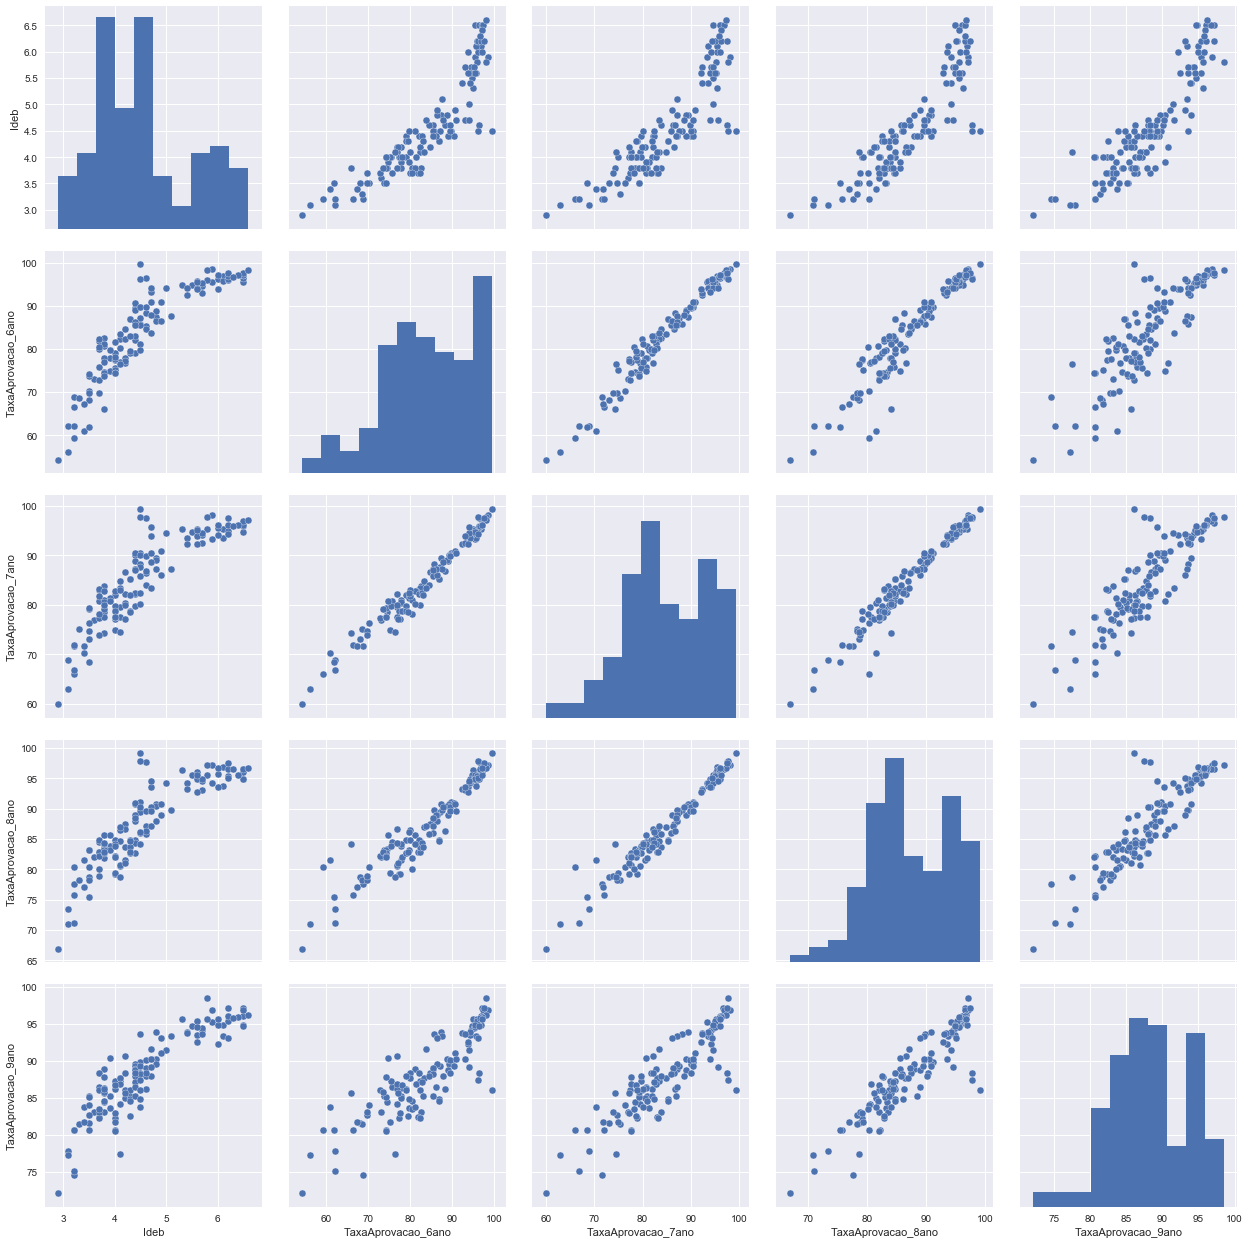

In [100]:
#scatterplot
categorical_features = dados2015_fim.select_dtypes(include = ["object"]).columns
numerical_features = dados2015_fim.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("Ideb")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
dados2015_fim_num = dados2015_fim[numerical_features]
dados2015_fim_cat = dados2015_fim[categorical_features]

sns.set()
cols = ['Ideb']
cols.extend(numerical_features[1:5].tolist())
sns.pairplot(dados2015_fim[cols], size = 3.5)
plt.show();

# Ano 2017

In [101]:
dados2017_inic = pd.DataFrame(regioes_anosiniciais2005_2017.iloc[:,0:2])
dados2017_inic = pd.concat([dados2017_inic,regioes_anosiniciais2005_2017.filter(like='2017')], axis=1)
dados2017_inic = dados2017_inic.rename(columns={"TaxaAprovacao2017_1ao5ano": "TaxaAprovacao_1ao5ano",
                                     "TaxaAprovacao2017_1ano": "TaxaAprovacao_1ano",
                                     "TaxaAprovacao2017_2ano": "TaxaAprovacao_2ano",
                                     "TaxaAprovacao2017_3ano": "TaxaAprovacao_3ano",
                                     "TaxaAprovacao2017_4ano": "TaxaAprovacao_4ano",
                                     "TaxaAprovacao2017_5ano": "TaxaAprovacao_5ano",
                                     "IndicadorRendimento_2017": "IndicadorRendimento_inicial",
                                     "NotaProvaBrasil_MT_2017": "NotaProvaBrasil_MT_inicial",
                                     "NotaProvaBrasil_LP_2017": "NotaProvaBrasil_LP_inicial",
                                     "NotaProvaBrasil_NotaMedia_2017": "NotaProvaBrasil_NotaMedia_inicial",
                                     "Ideb2017": "Ideb",
                                     "ProjecaoIdeb2017": "ProjecaoIdeb_inicial"})
dados2017_inic

,UF_REG,Rede,TaxaAprovacao_1ao5ano,TaxaAprovacao_1ano,TaxaAprovacao_2ano,TaxaAprovacao_3ano,TaxaAprovacao_4ano,TaxaAprovacao_5ano,IndicadorRendimento_inicial,NotaProvaBrasil_MT_inicial,NotaProvaBrasil_LP_inicial,NotaProvaBrasil_NotaMedia_inicial,Ideb,ProjecaoIdeb_inicial
0,Norte,Total,89.6,97.4,96.3,83.5,86.9,86.7,0.898171,205.04,196.56,5.455756586246315,4.9,4.7
1,Norte,Pública,88.8,97.2,96.0,82.2,86.0,85.7,0.890207,207.16,198.87,5.538284098579112,4.9,4.6
2,Norte,Privada,98.7,98.8,99.1,98.4,98.5,98.5,0.986593,239.66,236.70000000000002,6.847417698231202,6.8,6.9
3,Norte,Estadual,92.0,97.6,96.4,85.3,94.2,90.0,0.924736,216.28,208.32,5.884442815076509,5.4,4.9
4,Rondônia,Total,93.1,98.3,98.6,86.5,90.6,94.2,0.934076,225.44,215.92000000000002,6.197713381909173,5.8,5.3
5,Rondônia,Pública,92.5,98.2,98.5,85.4,89.9,93.8,0.928856,222.74,213.21,6.096827442681871,5.7,5.2
6,Rondônia,Privada,99.3,99.9,99.9,98.4,99.3,98.9,0.992766,252.57,243.16,7.211603392023289,7.2,7.0
7,Rondônia,Estadual,93.9,98.1,98.8,88.6,93.1,95.2,0.946125,231.24,222.18,6.422408200323273,6.1,5.2
8,Acre,Total,91.1,98.1,84.1,89.2,91.2,93.8,0.910400,231.51,219.37,6.376451837204344,5.8,5.1
9,Acre,Pública,90.7,98.0,83.3,88.7,90.8,93.6,0.906128,229.63,217.44,6.305422465779031,5.7,5.0


In [102]:
dados2017_inic = dados2017_inic[dados2017_inic['Ideb']!= '-']
dados2017_inic = dados2017_inic.reset_index()
dados2017_inic['Ideb'] = pd.to_numeric(dados2017_inic['Ideb'])

Numerical features : 9
Categorical features : 5


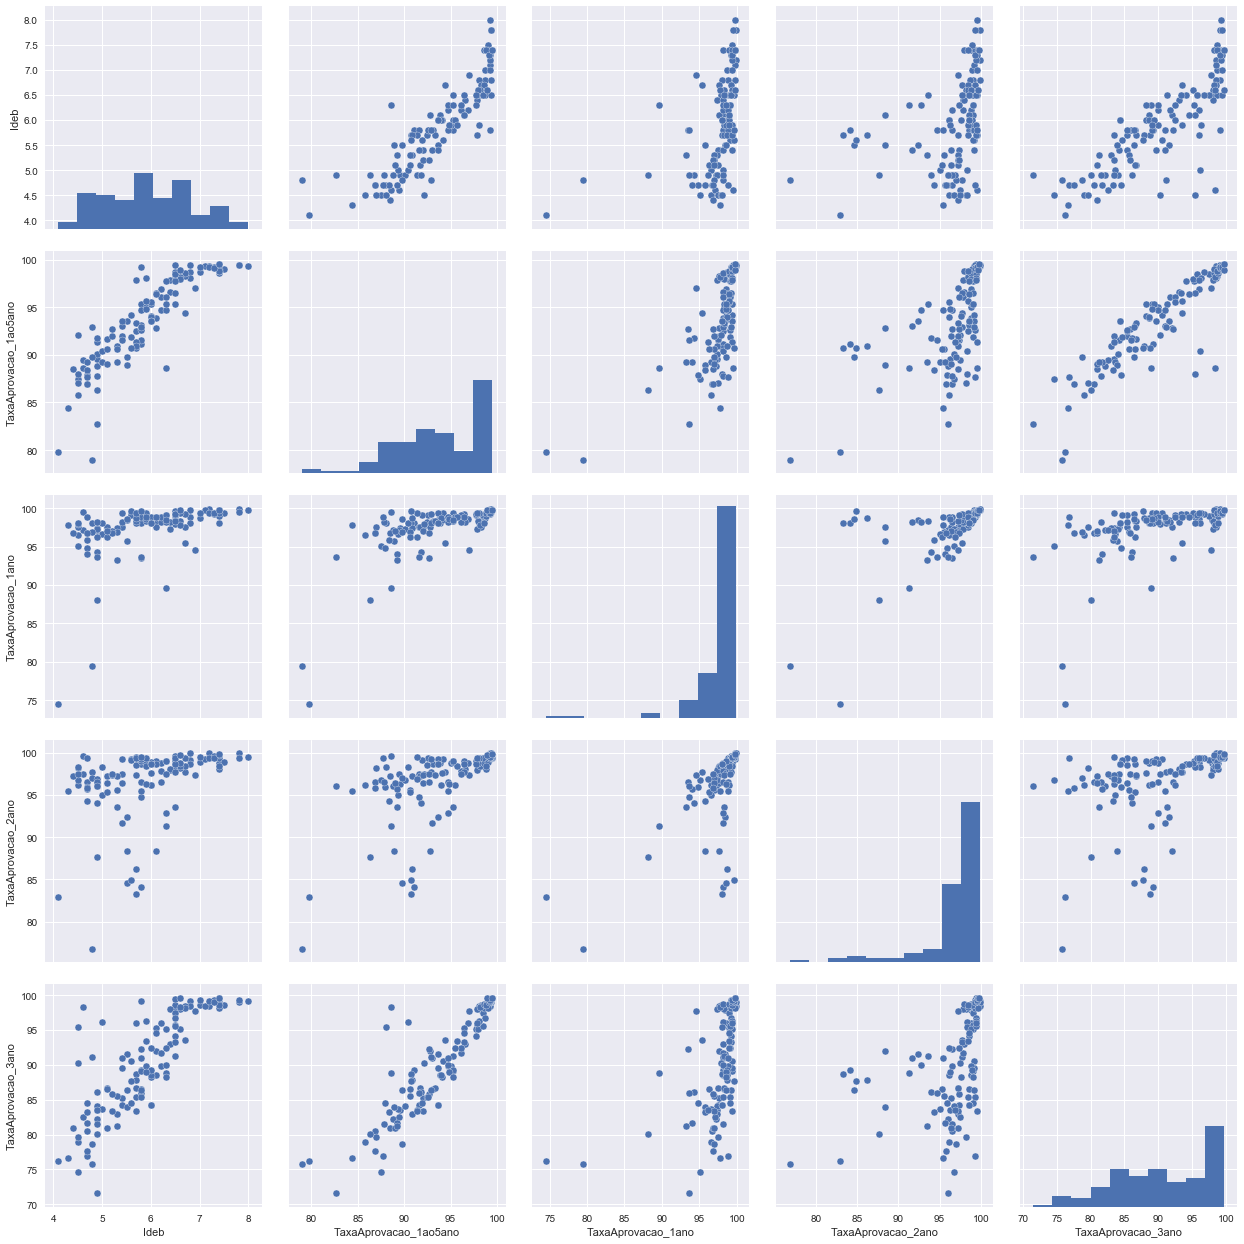

In [103]:
#scatterplot
categorical_features = dados2017_inic.select_dtypes(include = ["object"]).columns
numerical_features = dados2017_inic.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("Ideb")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
dados2017_inic_num = dados2017_inic[numerical_features]
dados2017_inic_cat = dados2017_inic[categorical_features]
sns.set()
cols = ['Ideb']
cols.extend(numerical_features[1:5].tolist())
sns.pairplot(dados2017_inic[cols], size = 3.5)
plt.show();

In [104]:
dados2017_fim = pd.DataFrame(regioes_anosfinais2005_2017.iloc[:,0:2])
dados2017_fim = pd.concat([dados2017_fim,regioes_anosfinais2005_2017.filter(like='2017')], axis=1)
dados2017_fim = dados2017_fim.rename(columns={"TaxaAprovacao2017_6ao9ano": "TaxaAprovacao_6ao9ano",
                                     "TaxaAprovacao2017_6ano": "TaxaAprovacao_6ano",
                                     "TaxaAprovacao2017_7ano": "TaxaAprovacao_7ano",
                                     "TaxaAprovacao2017_8ano": "TaxaAprovacao_8ano",
                                     "TaxaAprovacao2017_9ano": "TaxaAprovacao_9ano",
                                     "IndicadorRendimento_2017": "IndicadorRendimento_finais",
                                     "NotaProvaBrasil_MT_2017": "NotaProvaBrasil_MT_finais",
                                     "NotaProvaBrasil_LP_2017": "NotaProvaBrasil_LP_finais",
                                     "NotaProvaBrasil_NotaMedia_2017": "NotaProvaBrasil_NotaMedia_finais",
                                     "Ideb2017": "Ideb",
                                     "ProjecaoIdeb2017": "ProjecaoIdeb_finais"})
dados2017_fim

,UF_REG,Rede,TaxaAprovacao_6ao9ano,TaxaAprovacao_6ano,TaxaAprovacao_7ano,TaxaAprovacao_8ano,TaxaAprovacao_9ano,IndicadorRendimento_finais,NotaProvaBrasil_MT_finais,NotaProvaBrasil_LP_finais,NotaProvaBrasil_NotaMedia_finais,Ideb,ProjecaoIdeb_finais
0,Norte,Total,84.9,81.3,84.4,87.5,87.8,0.851670,246.18,251.29,4.957833,4.2,4.7
1,Norte,Pública,84.0,80.2,83.4,86.6,87.1,0.842325,241.77,247.17,4.815667,4.1,4.5
2,Norte,Privada,97.0,97.0,97.1,97.3,96.5,0.969741,284.76,287.37,6.202167,6.0,6.6
3,Norte,Estadual,86.1,84.6,85.9,87.5,86.7,0.861616,242.95,248.29,4.854000,4.2,4.6
4,Rondônia,Total,90.6,89.1,90.1,91.3,92.7,0.907801,262.59,263.56,5.435833,4.9,4.9
5,Rondônia,Pública,90.2,88.6,89.6,90.8,92.4,0.903279,258.81,260.42,5.320500,4.8,4.6
6,Rondônia,Privada,97.0,96.9,97.0,96.9,97.0,0.969500,304.28,298.31,6.709833,6.5,7.0
7,Rondônia,Estadual,91.1,90.7,90.8,91.1,92.0,0.911471,258.94,260.53,5.324500,4.9,4.7
8,Acre,Total,91.5,91.0,92.3,91.6,91.2,0.915223,252.42,256.70,5.152000,4.7,5.0
9,Acre,Pública,91.2,90.7,92.0,91.3,90.8,0.911971,250.32,254.38,5.078333,4.6,4.9


Numerical features : 10
Categorical features : 2


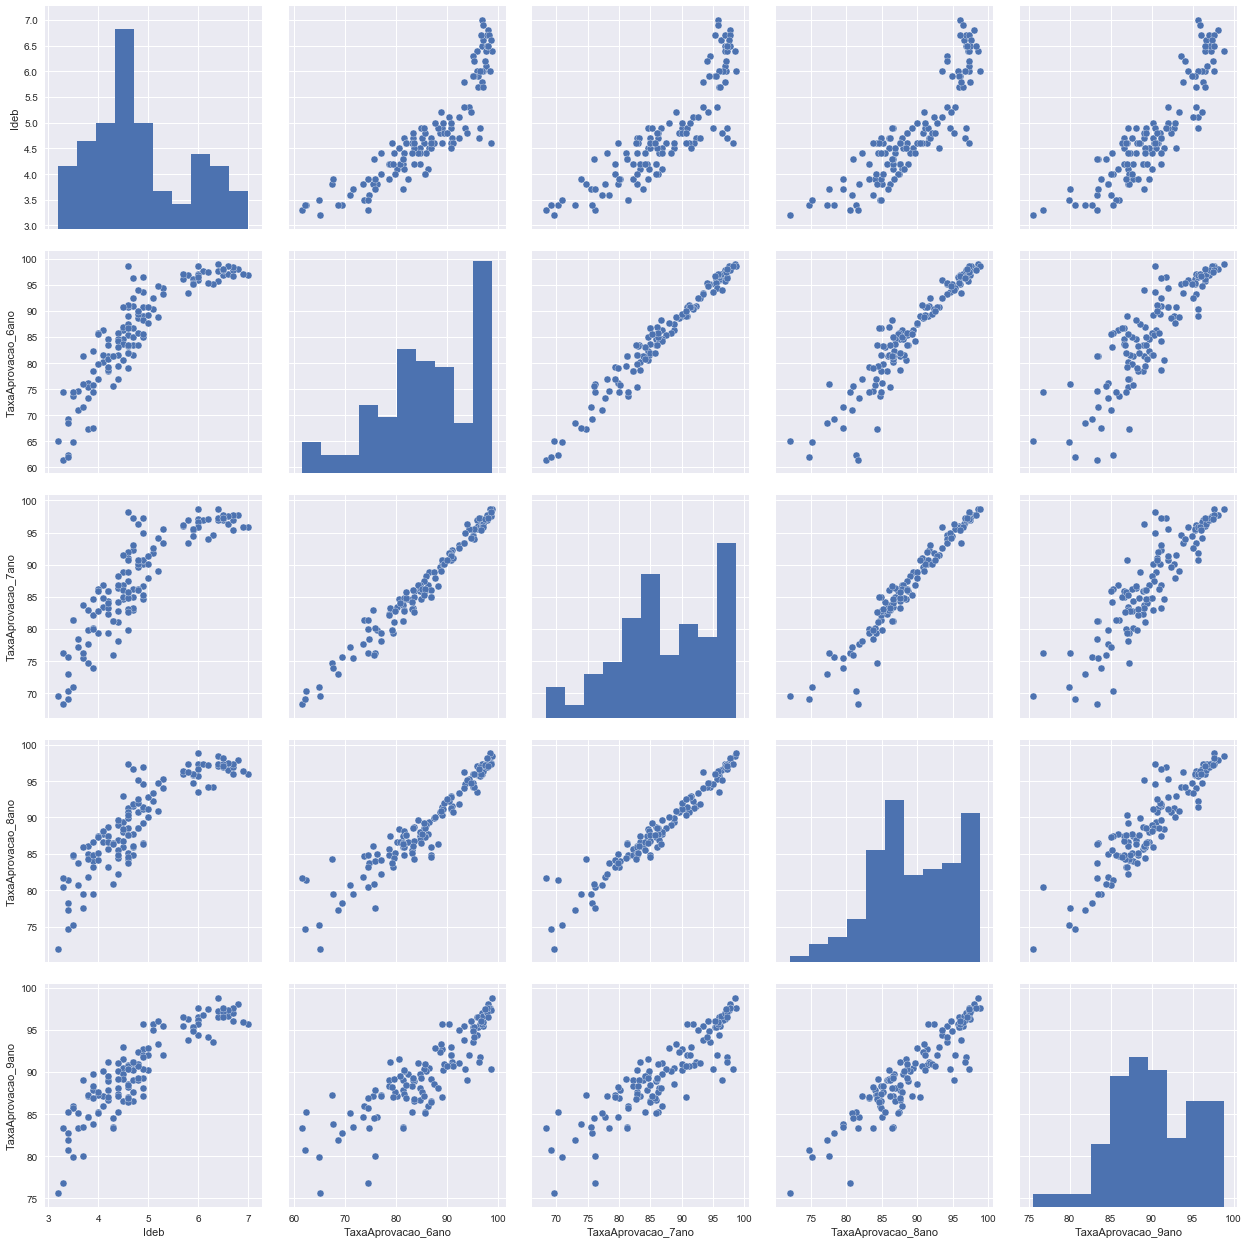

In [105]:
#scatterplot
categorical_features = dados2017_fim.select_dtypes(include = ["object"]).columns
numerical_features = dados2017_fim.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("Ideb")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
dados2017_fim_num = dados2017_fim[numerical_features]
dados2017_fim_cat = dados2017_fim[categorical_features]

sns.set()
cols = ['Ideb']
cols.extend(numerical_features[1:5].tolist())
sns.pairplot(dados2017_fim[cols], size = 3.5)
plt.show();

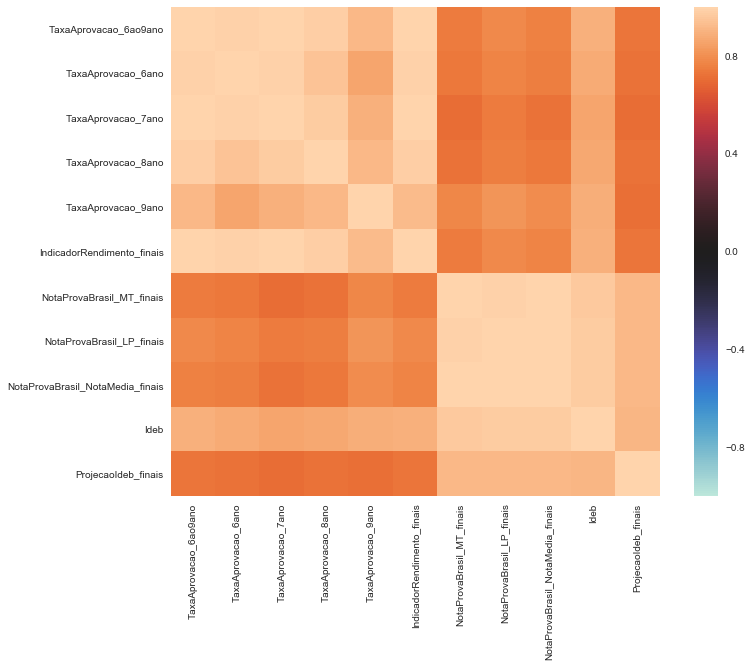

In [115]:
numerical_features = dados2017_fim.select_dtypes(exclude = ["object"]).columns
dados2017_fim_num = dados2017_fim[numerical_features]
corrmat = dados2017_fim_num.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmin=-1,vmax=1, square=True,center=0)

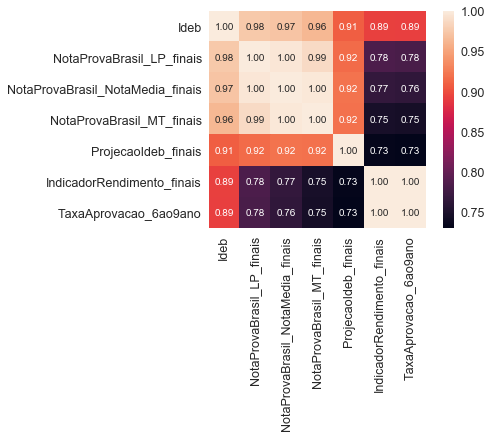

In [119]:
k = 7 #number of variables for heatmap

cols = corrmat.nlargest(k, 'Ideb')['Ideb'].index
cm = np.corrcoef(dados2017_fim_num[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()